In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('stock.xls')

# ANALISIS EXPLORATORIO DE DATOS (EDA)

* El analisis exploratorio de datos tiene como objetivo obtener informacion sobre el dataset escogido

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
1,2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2,2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
3,2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
4,2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3019 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3019 non-null   float64
 5   Volume  3019 non-null   int64  
 6   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


In [5]:
df.tail()

,Date,Open,High,Low,Close,Volume,Name
3014,2017-12-22,71.42,71.87,71.22,71.58,10979165,AABA
3015,2017-12-26,70.94,71.39,69.63,69.86,8542802,AABA
3016,2017-12-27,69.77,70.49,69.69,70.06,6345124,AABA
3017,2017-12-28,70.12,70.32,69.51,69.82,7556877,AABA
3018,2017-12-29,69.79,70.13,69.43,69.85,6613070,AABA


In [6]:
df.shape

(3019, 7)

# PREPROCESAMIENTO

In [7]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [8]:
# Inspeccionar los primeros valores de la columna
print(df['Date'].head())

# Reemplazar posibles valores incorrectos
# Por ejemplo, si hay valores vacíos o nulos que deberían ser reemplazados
df['Date'] = df['Date'].replace('', pd.NA)

# Convertir la columna a datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Verificar la conversión
print(df['Date'].head())


0    2006-01-03
1    2006-01-04
2    2006-01-05
3    2006-01-06
4    2006-01-09
Name: Date, dtype: object
0   2006-01-03
1   2006-01-04
2   2006-01-05
3   2006-01-06
4   2006-01-09
Name: Date, dtype: datetime64[ns]


In [9]:
df.describe()

,Date,Open,High,Low,Close,Volume
count,3019,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,2012-01-01 20:00:33.388539392,28.426479,28.766532,28.066558,28.412726,2.158391e+07
min,2006-01-03 00:00:00,9.100000,9.480000,8.940000,8.950000,1.939061e+06
25%,2009-01-01 00:00:00,16.175000,16.385000,15.970000,16.130000,1.248025e+07
50%,2011-12-30 00:00:00,27.180000,27.490000,26.820000,27.100000,1.732130e+07
75%,2015-01-01 00:00:00,36.655000,37.035000,36.305000,36.635000,2.512757e+07
max,2017-12-29 00:00:00,73.020000,73.250000,72.460000,72.930000,4.382317e+08
std,NaN,13.257242,13.356692,13.157326,13.258163,1.926231e+07


In [10]:
#establecer fecha como indice
df.set_index('Date', inplace=True)

In [11]:
df = df.drop(columns=['Name'])
df = df.drop(columns=['Volume'])

# Verificar que la columna haya sido eliminada
print(df.head())

             Open   High    Low  Close
Date                                  
2006-01-03  39.69  41.22  38.79  40.91
2006-01-04  41.22  41.90  40.77  40.97
2006-01-05  40.93  41.73  40.85  41.53
2006-01-06  42.88  43.57  42.80  43.21
2006-01-09  43.10  43.66  42.82  43.42


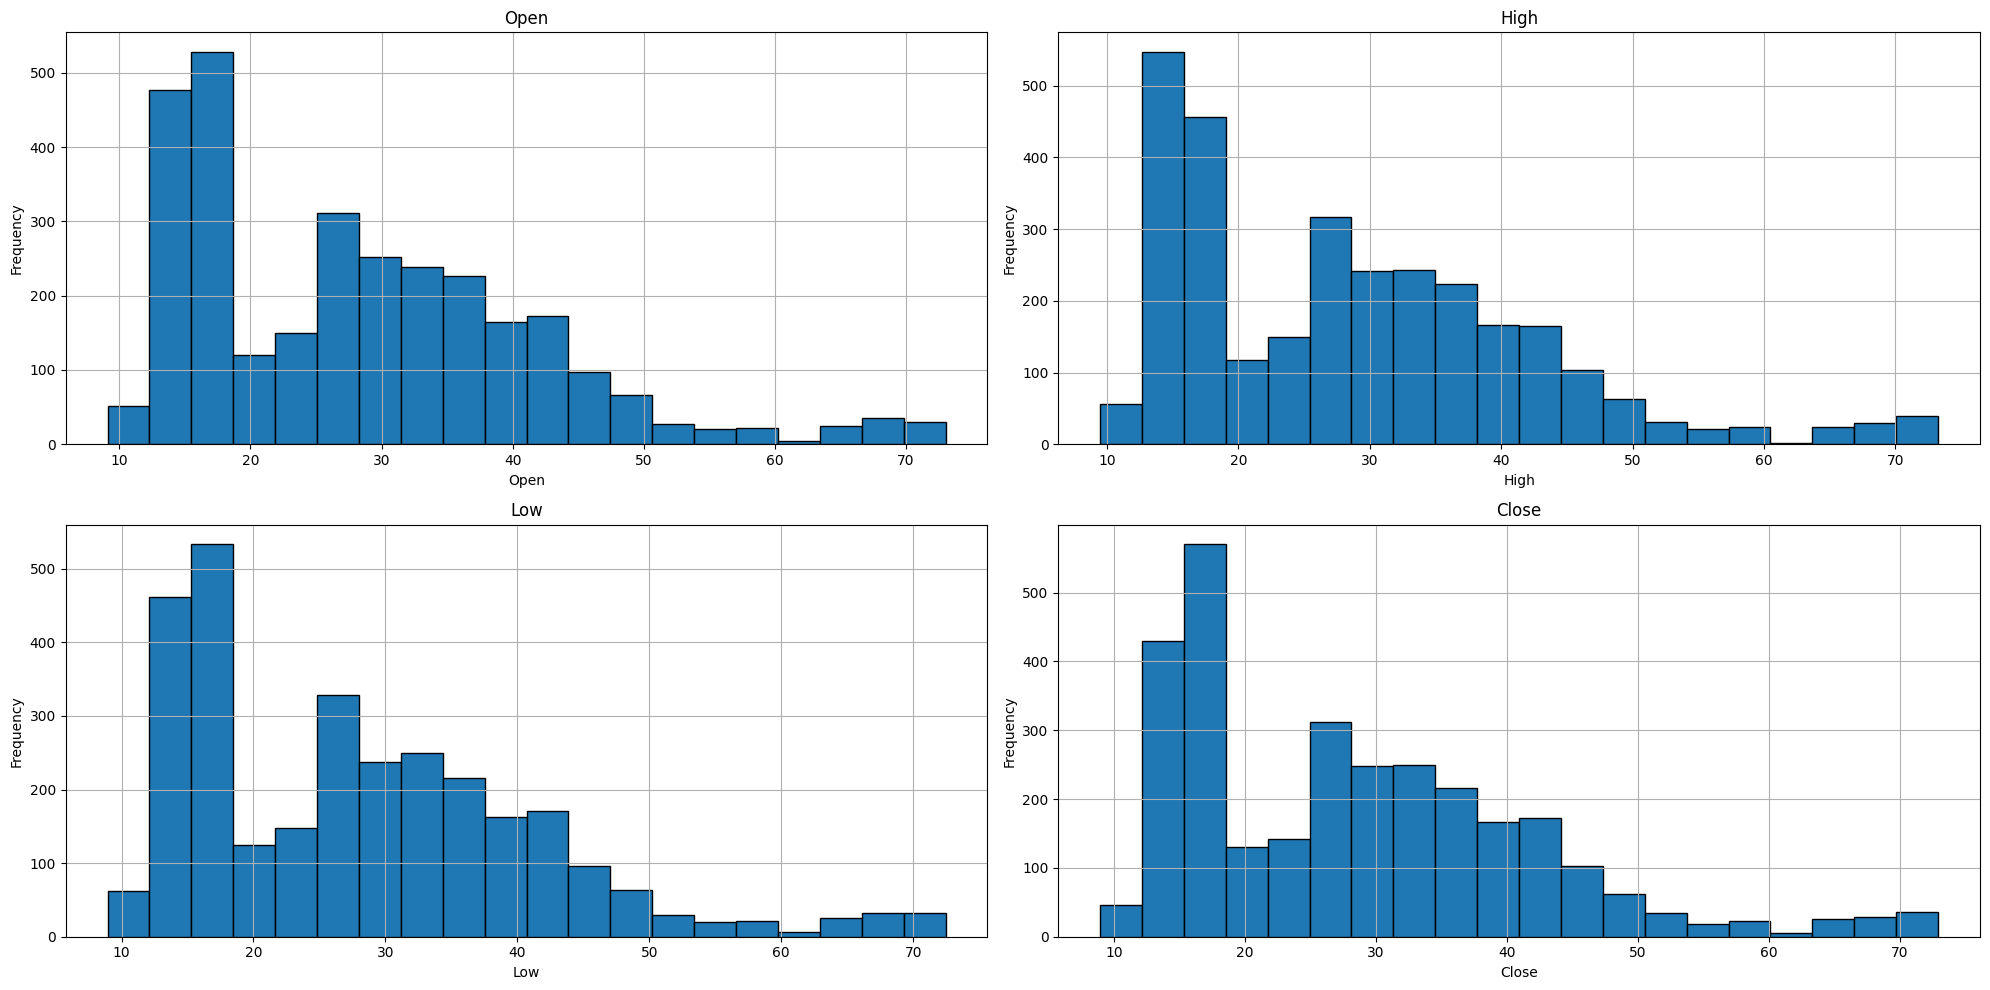

In [12]:
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
numeric_cols = ['Open', 'High', 'Low', 'Close']
numeric_df = df[numeric_cols]

# Histograma
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_df.columns):
    ax = axes[i]
    numeric_df[col].plot(kind='hist', ax=ax, title=col, bins=20, edgecolor='black')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.show()

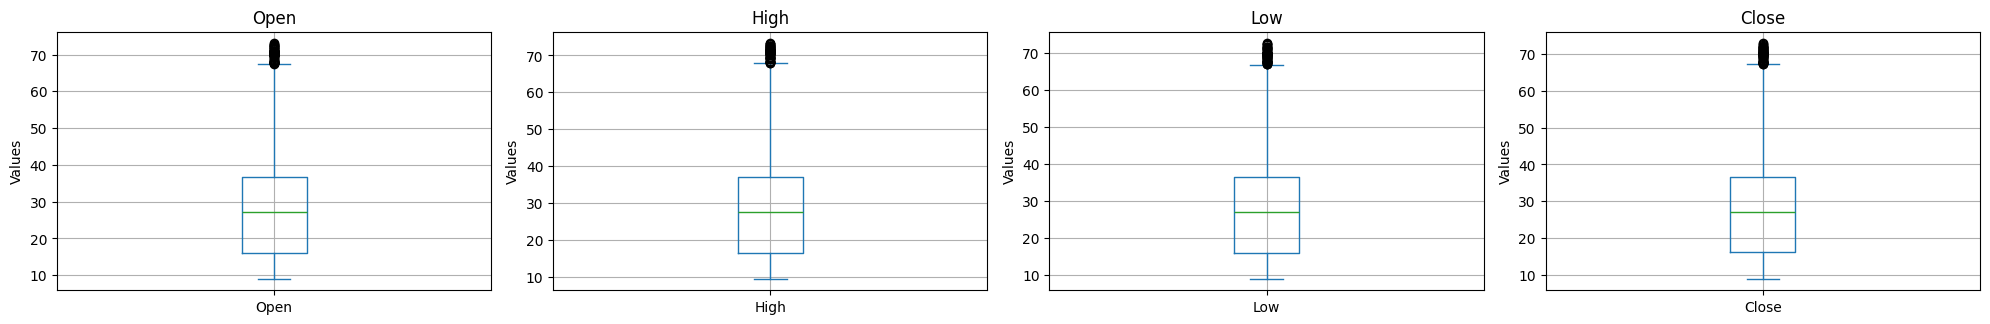

In [13]:
# Crear boxplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))  # Ajusta el número de filas y columnas según la cantidad de variables
axes = axes.flatten()  # Aplanar el array de ejes para facilitar el acceso

for i, col in enumerate(df.columns):
    ax = axes[i]
    df[col].plot(kind='box', ax=ax, title=col)
    ax.set_ylabel('Values')
    ax.grid(True)

# Eliminar los ejes vacíos si hay menos variables que subgráficos
for i in range(len(df.columns), len(axes)):
    fig.delaxes(axes[i])

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.show()

# TRATAMIENTO DE OUTLIERS


El boxplot por columna proporciono informacion necesaria sobre la cantidad de outliers.
Los outliers de detectan mediante el metodo de recorrido intercuartil, luego de esos se convertiran en NaN, para luego imputar los valores perdidos mediante el metodo de la interpolacion, de esta manera disminuimos los errores.

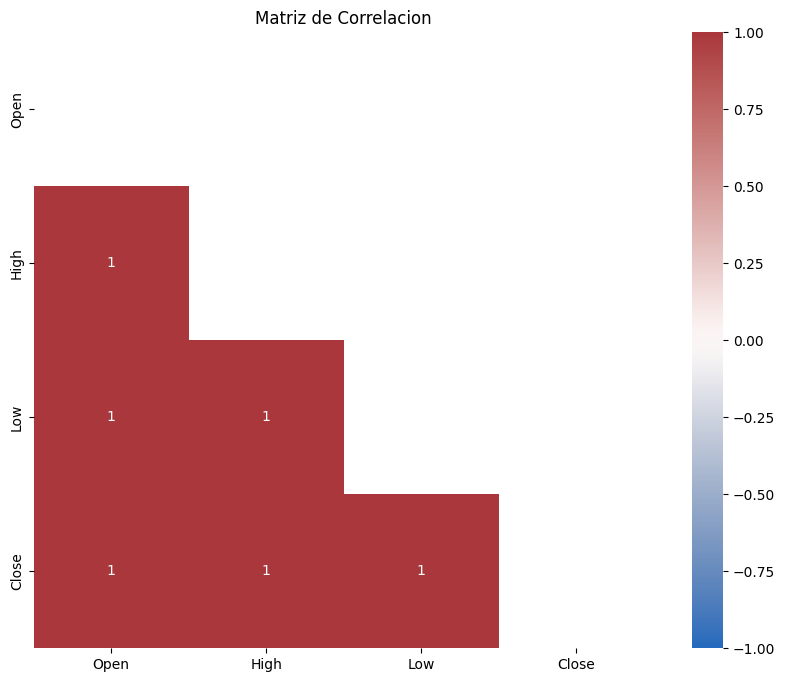

In [14]:
import seaborn as sns

# Correlacion entre series
import numpy as np
matrix = df.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.title('Matriz de Correlacion')
plt.show()

In [15]:
# Calcular la matriz de correlación
corr_matrix = df[['Open', 'High', 'Low', 'Close']].corr()

# Imprimir la matriz de correlación
print(corr_matrix)

           Open      High       Low     Close
Open   1.000000  0.999706  0.999579  0.999322
High   0.999706  1.000000  0.999519  0.999665
Low    0.999579  0.999519  1.000000  0.999717
Close  0.999322  0.999665  0.999717  1.000000


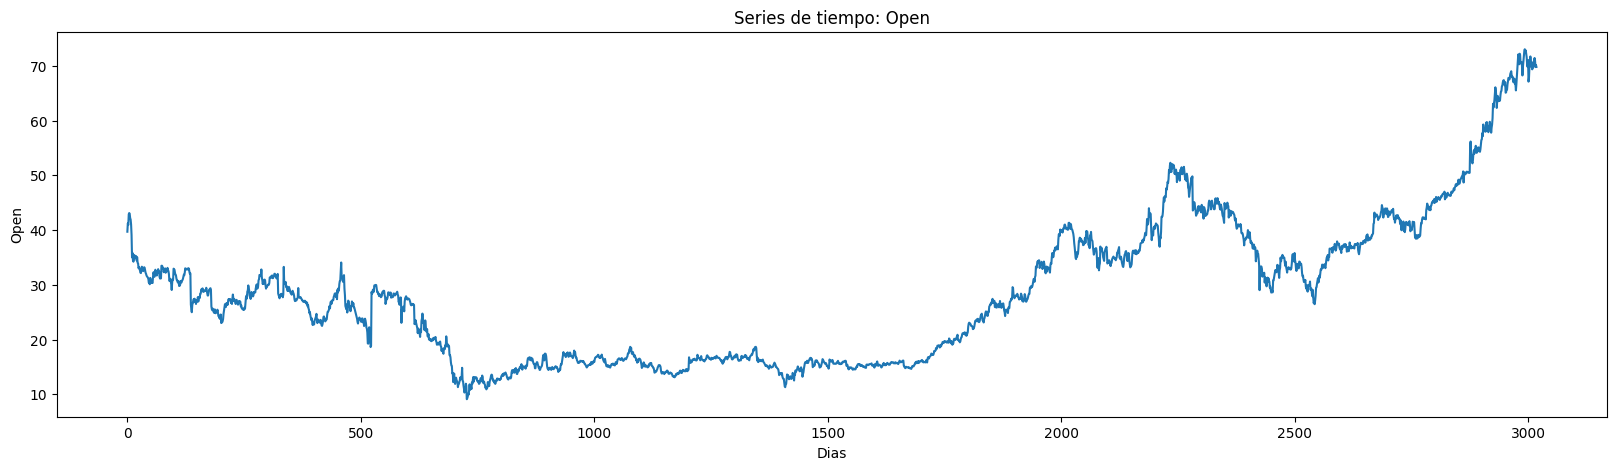

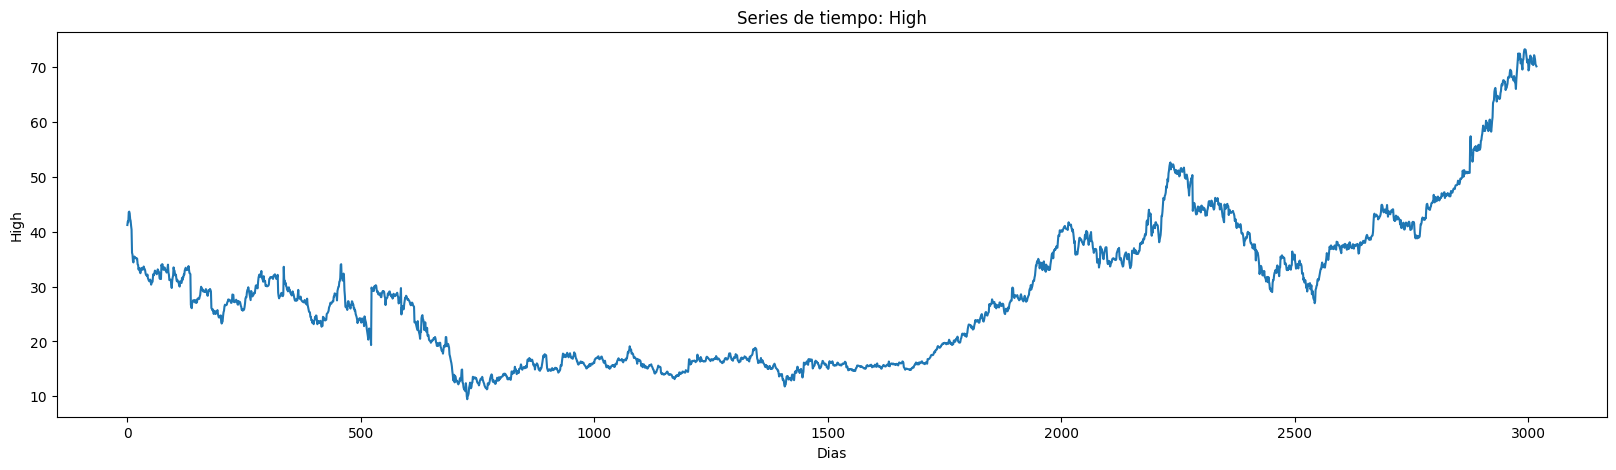

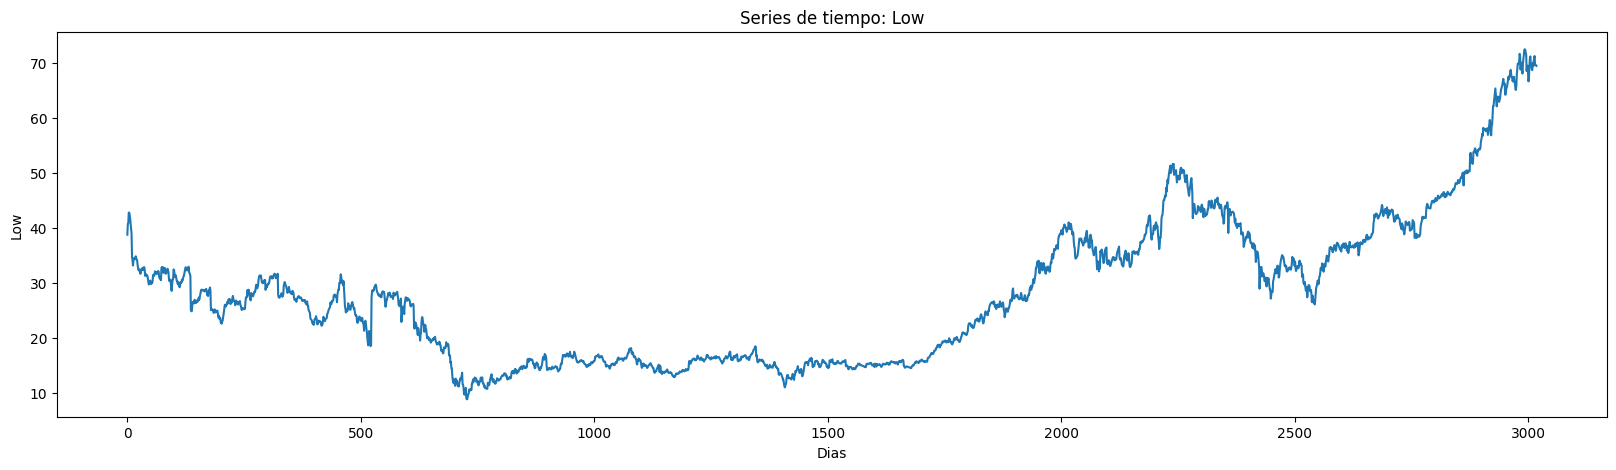

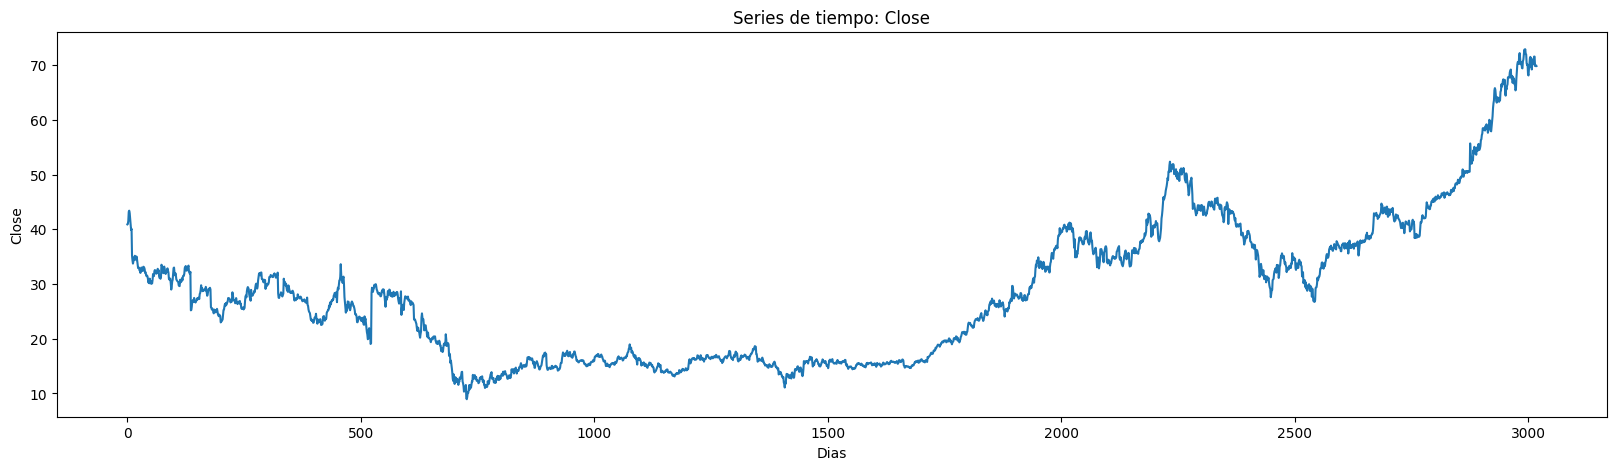

In [16]:
import matplotlib.pyplot as plt

# Define el tamaño de cada figura
fig_size = (20, 5)  # Ajusta el tamaño según tus necesidades

# Itera sobre las columnas del DataFrame
for column in df.columns:
    plt.figure(figsize=fig_size)  # Crea una nueva figura para cada columna
    df[column].plot(use_index=False)
    plt.xlabel('Dias')
    plt.ylabel(column)
    plt.title(f'Series de tiempo: {column}')
    plt.show()

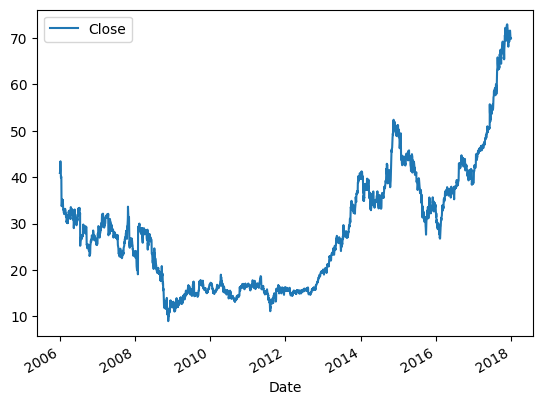

In [17]:
# Serie de tiempo
df.plot(y="Close")
plt.show()

# Descomposición

In [18]:
# Importar libreria para realizar descomposición de la serie
from statsmodels.tsa.api import (seasonal_decompose)

In [19]:
# Establecer formato de tamaño de gráficos
plt.rcParams["figure.figsize"] = [8, 5]

Text(0.5, 1.05, 'Descomposición de la serie en 30 días (modelo aditivo)')

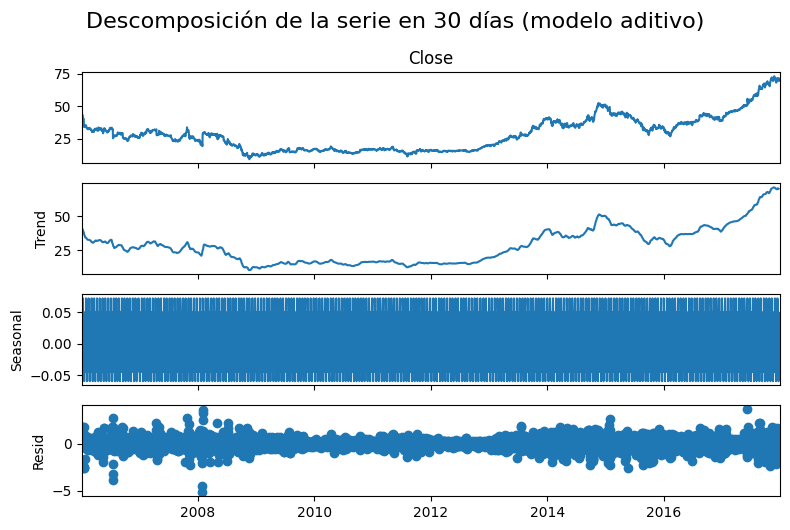

In [20]:
# Descomposición de la serie
sd = seasonal_decompose(df["Close"],period=12)
sd.plot();
plt.suptitle('Descomposición de la serie en 30 días (modelo aditivo)', fontsize=16, y=1.05)

Text(0.5, 1.05, 'Descomposición de la serie en 1 año (modelo aditivo)')

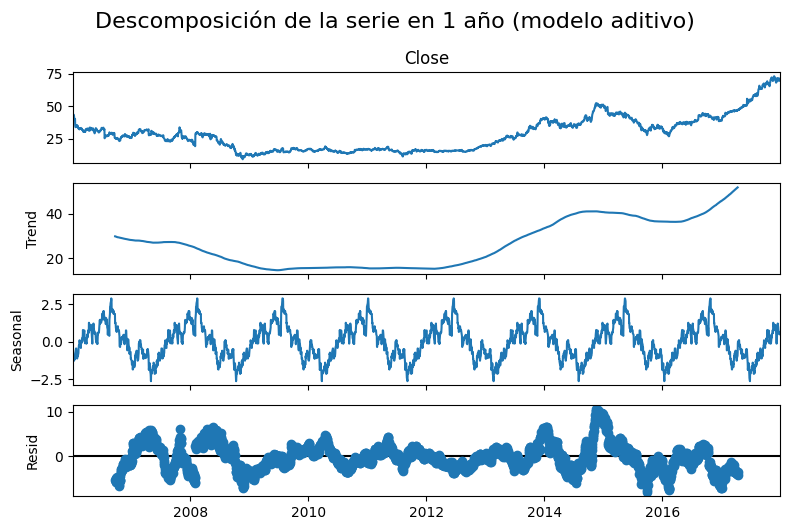

In [21]:
# Descomposición de la serie
sd = seasonal_decompose(df["Close"],period=365)
sd.plot();
plt.suptitle('Descomposición de la serie en 1 año (modelo aditivo)', fontsize=16, y=1.05)

Text(0.5, 1.05, 'Descomposición de la serie en 1 año (modelo multiplicativo)')

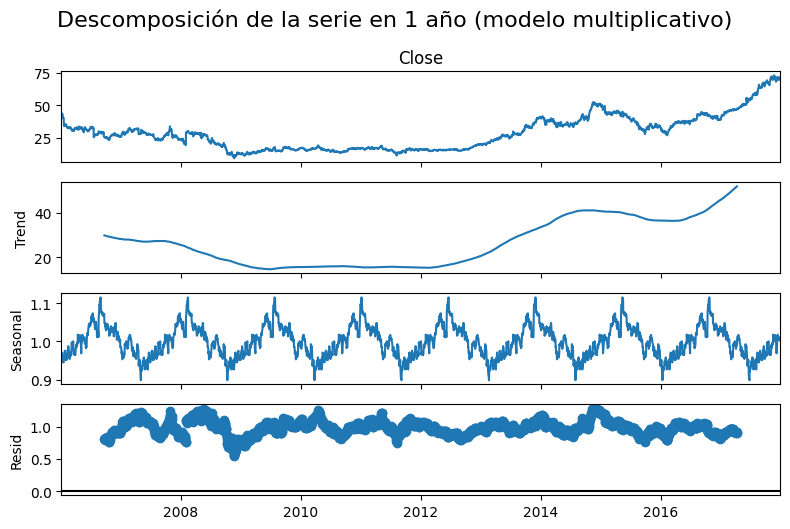

In [22]:
# Descomposición de la serie
sd = seasonal_decompose(df["Close"],model="multiplicative",period=365)
sd.plot();
plt.suptitle('Descomposición de la serie en 1 año (modelo multiplicativo)', fontsize=16, y=1.05)

# Autocovarianza

In [23]:
#Calcular la varianza de la serie de tiempo
varianza = df['Close'].var()
print(varianza)

175.77889240041694


In [24]:
df.describe()

,Open,High,Low,Close
count,3019.000000,3019.000000,3019.000000,3019.000000
mean,28.426479,28.766532,28.066558,28.412726
std,13.257242,13.356692,13.157326,13.258163
min,9.100000,9.480000,8.940000,8.950000
25%,16.175000,16.385000,15.970000,16.130000
50%,27.180000,27.490000,26.820000,27.100000
75%,36.655000,37.035000,36.305000,36.635000
max,73.020000,73.250000,72.460000,72.930000


In [25]:
# Calcular la autocovarianza con lag de 1
autocovarianza_lag1 = df['Close'].cov(df['Close'].shift(1))

# Calcular la autocovarianza con lag de 7
autocovarianza_lag7 = df['Close'].cov(df['Close'].shift(7))

# Calcular la autocovarianza con lag de 30
autocovarianza_lag30 = df['Close'].cov(df['Close'].shift(30))

# Imprimir los resultados
print("Autocovarianza:")
print("Autocovarianza con 1 rezago:", round(autocovarianza_lag1, 4))
print("Autocovarianza con 7 rezagos:", round(autocovarianza_lag7, 4))
print("Autocovarianza con 30 rezagos:", round(autocovarianza_lag30, 4))

Autocovarianza:
Autocovarianza con 1 rezago: 175.3279
Autocovarianza con 7 rezagos: 172.6504
Autocovarianza con 30 rezagos: 163.2521


In [26]:
print("Comparación con la varianza:")
print("Autocovarianza con 1 rezago:", round(autocovarianza_lag1 / varianza,4))
print("Autocovarianza con 7 rezagos:", round(autocovarianza_lag7 / varianza,4))
print("Autocovarianza con 30 rezagos:", round(autocovarianza_lag30 / varianza,4))

Comparación con la varianza:
Autocovarianza con 1 rezago: 0.9974
Autocovarianza con 7 rezagos: 0.9822
Autocovarianza con 30 rezagos: 0.9287


# Autocorrelación

In [27]:
# Calcular la autocorrelación con lag de 1
autocorrelacion_lag1 = df['Close'].autocorr(lag=1)
print("Autocorrelación con 1 rezago:", round(autocorrelacion_lag1, 4))

# Calcular la autocorrelación con lag de 7
autocorrelacion_lag7 = df['Close'].autocorr(lag=7)
print("Autocorrelación con 7 rezagos:", round(autocorrelacion_lag7, 4))

# Calcular la autocorrelación con lag de 30
autocorrelacion_lag30 = df['Close'].autocorr(lag=30)
print("Autocorrelación con 30 rezagos:", round(autocorrelacion_lag30, 4))

Autocorrelación con 1 rezago: 0.9989
Autocorrelación con 7 rezagos: 0.9929
Autocorrelación con 30 rezagos: 0.9726


In [28]:
# Importar librería
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

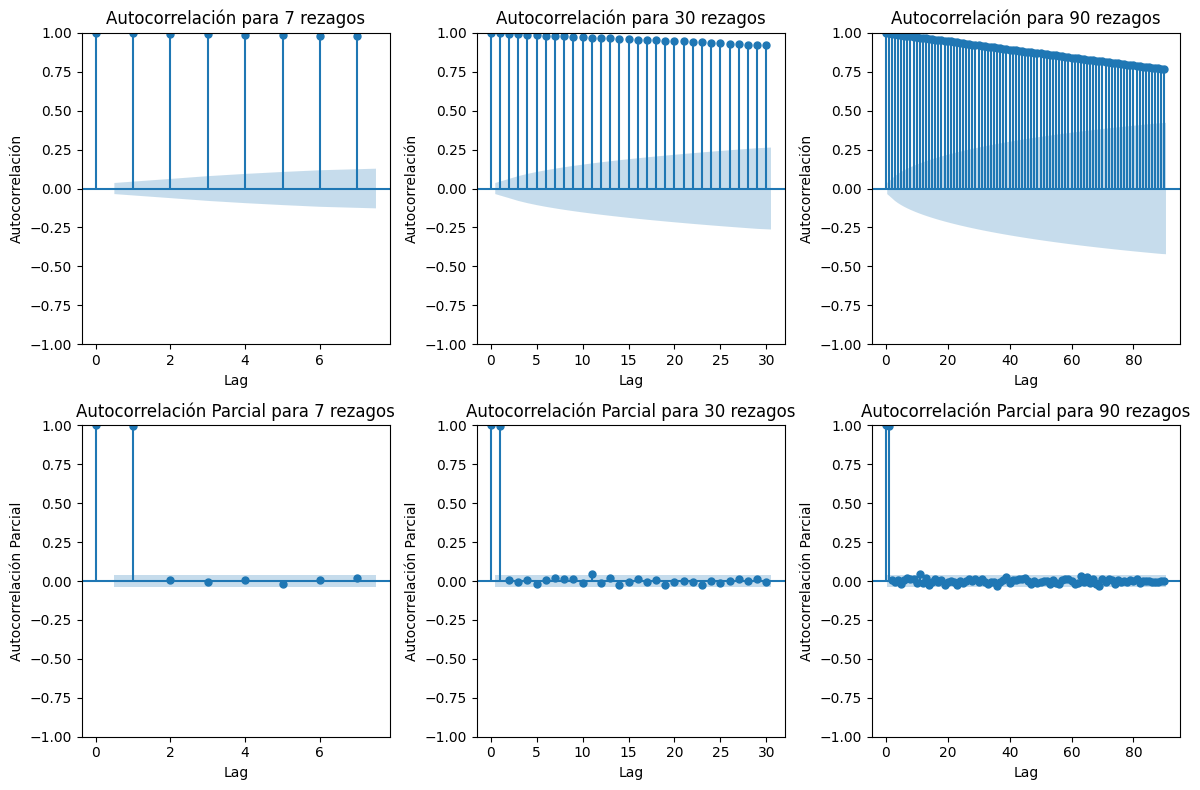

In [29]:
# Números de rezagos
lag_numbers = [7, 30, 90]

# Títulos
titles_acf = ['Autocorrelación para 7 rezagos', 'Autocorrelación para 30 rezagos', 'Autocorrelación para 90 rezagos']
titles_pacf = ['Autocorrelación Parcial para 7 rezagos', 'Autocorrelación Parcial para 30 rezagos', 'Autocorrelación Parcial para 90 rezagos']

# Configurar el número total de gráficos
num_plots = len(lag_numbers)

# Configurar el número de filas y columnas
num_rows = 2
num_cols = num_plots

# Configurar el tamaño de la figura
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Generar los gráficos de ACF
for lag, title, ax in zip(lag_numbers, titles_acf, axes[0]):
    plot_acf(df['Close'], lags=lag, alpha=0.05, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Lag')
    ax.set_ylabel('Autocorrelación')

# Generar los gráficos de PACF
for lag, title, ax in zip(lag_numbers, titles_pacf, axes[1]):
    plot_pacf(df['Close'], lags=lag, alpha=0.05, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Lag')
    ax.set_ylabel('Autocorrelación Parcial')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

# Estacionariedad

In [30]:
# Importar librerías para test de estacionariedad
from statsmodels.tsa.stattools import adfuller,kpss

In [31]:
# Definir función para calcular estacionariedad
def print_results(output, test='adf'):
    pval = output[1]
    test_score = output[0]
    lags = output[2]
    decision = 'No Estacionaria'
    if test == 'adf':
        critical = output[4]
        if pval < 0.05:
            decision = 'Estacionaria'
    elif test=='kpss':
        critical = output[3]
        if pval >= 0.05:
            decision = 'Estacionaria'
    output_dict = {
    'Test Statistic': test_score,
    'p-value': pval,
    'Rezagos': lags,
    'Decisión': decision
    }
    for key, value in critical.items():
        output_dict["Critical Value (%s)" % key] = value

    return pd.Series(output_dict, name=test)

In [32]:
adf_output = adfuller(df['Close'])
kpss_output = kpss(df['Close'])
pd.concat([
    print_results(adf_output, 'adf'),
    print_results(kpss_output, 'kpss')
    ], axis=1)

C:\Users\Diego\AppData\Local\Temp\ipykernel_20252\2259141138.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_output = kpss(df['Close'])


,adf,kpss
Test Statistic,0.947898,4.659052
p-value,0.993685,0.01
Rezagos,19,32
Decisión,No Estacionaria,No Estacionaria
Critical Value (1%),-3.432532,0.739
Critical Value (5%),-2.862504,0.463
Critical Value (10%),-2.567283,0.347
Critical Value (2.5%),NaN,0.574


# MODELOS ESTOCÁSTICOS

# PREPROCESAMIENTO

In [33]:
#Calcular el índice que represente aproximadamente el 80% de tus datos
index_split = int(len(df) * 0.80)

#Seleccionar la fecha correspondiente al índice calculado
split_date = df.iloc[index_split].name

print(f"Fecha de división: {split_date}")

Fecha de división: 2015-08-10 00:00:00


In [34]:
# Importar librerías necesarias
from sklearn.model_selection import train_test_split

# Especificar el punto de división del conjunto de entrenamiento y prueba
split_date = pd.to_datetime('2015-08-10 00:00:00')  # Se utiliza como fecha de corte el último mes del dataset
# (Dependiendo del caso, el tamaño del conjunto de prueba puede ser mayor o menor)

# Dividir los datos en conjuntos de entrenamiento y prueba
train = df.loc[df.index <= split_date]
test = df.loc[df.index > split_date]

print(f'Train set: {train.shape}')
print(f'Test set: {test.shape}')

Train set: (2416, 4)
Test set: (603, 4)


In [35]:
# Definir variable objetivo
y_train = train["Close"]
y_test = test["Close"]

In [36]:
# Últimas fechas del conjunto de entrenamiento
y_train.tail()

Date
2015-08-04    37.12
2015-08-05    37.25
2015-08-06    36.46
2015-08-07    36.67
2015-08-10    37.15
Name: Close, dtype: float64

In [37]:
# Primeras fechas del conjunto de prueba
y_test.head()

Date
2015-08-11    36.03
2015-08-12    34.49
2015-08-13    35.93
2015-08-14    36.24
2015-08-17    36.10
Name: Close, dtype: float64

In [38]:
# Últimas fechas del conjunto de entrenamiento
print(train.index[-5:])
# Primeras fechas del conjunto de prueba
print(test.index[:5])

DatetimeIndex(['2015-08-04', '2015-08-05', '2015-08-06', '2015-08-07',
               '2015-08-10'],
              dtype='datetime64[ns]', name='Date', freq=None)
DatetimeIndex(['2015-08-11', '2015-08-12', '2015-08-13', '2015-08-14',
               '2015-08-17'],
              dtype='datetime64[ns]', name='Date', freq=None)


# Modelo AR(p)

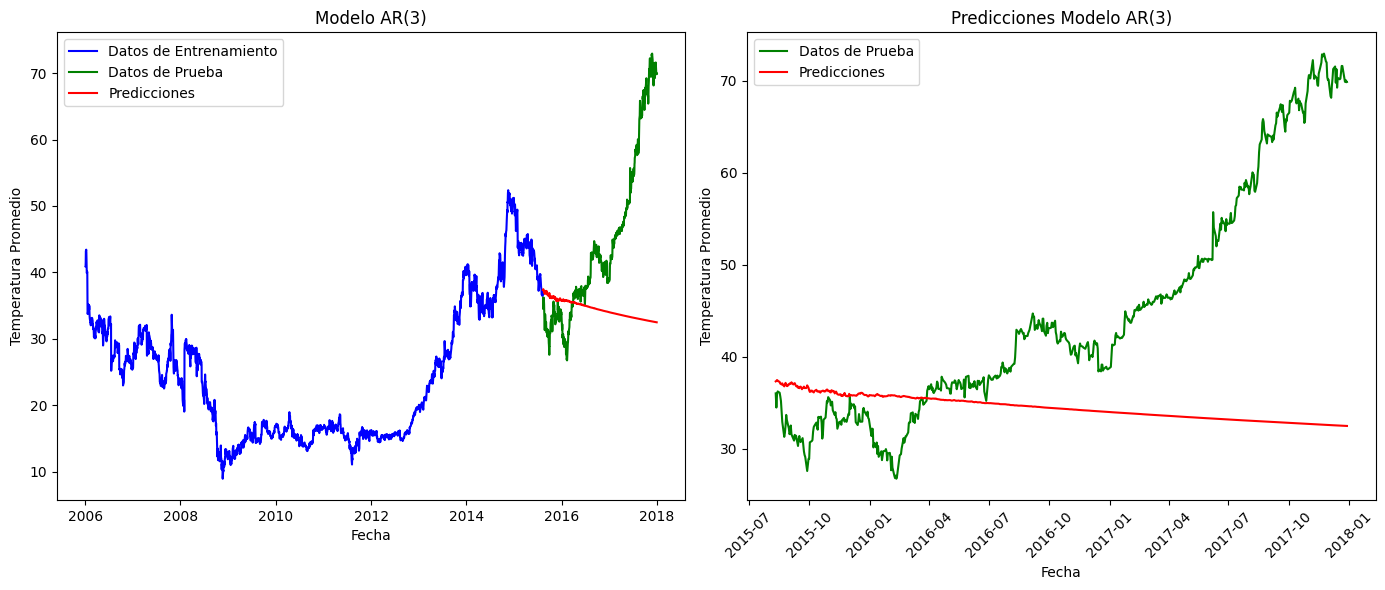

            Predicción AR(3)  Observación
Date                                     
2015-08-11         37.333119    36.030000
2015-08-12         37.384930    34.490000
2015-08-13         37.479592    35.930000
2015-08-14         37.415963    36.240000
2015-08-15         37.332655    36.193333
...                      ...          ...
2017-12-25         32.506046    70.290000
2017-12-26         32.502409    69.860000
2017-12-27         32.498888    70.060000
2017-12-28         32.495303    69.820000
2017-12-29         32.491596    69.850000

[872 rows x 2 columns]


In [39]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_predict

# Asegurarse de que el índice es un DatetimeIndex y está en orden cronológico
y_train.index = pd.to_datetime(y_train.index)
y_train = y_train.sort_index()
y_test.index = pd.to_datetime(y_test.index)
y_test = y_test.sort_index()

# Resamplear los datos a una frecuencia diaria y rellenar valores faltantes con interpolación
y_train = y_train.resample('D').interpolate()
y_test = y_test.resample('D').interpolate()

# Ahora, el índice tiene una frecuencia definida
y_train.index.freq = 'D'
y_test.index.freq = 'D'

# Modelo AR
modelo_AR = AutoReg(y_train, lags=200)
result = modelo_AR.fit()

# Predicción
pred_AR = result.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, dynamic=False)

# Ajustar el rango de fechas de las predicciones para que coincida con el índice de y_test
pred_df = pd.DataFrame({"Predicción AR(3)": pred_AR, "Observación": y_test})
pred_df.index = y_test.index  # Asegurarse de que las predicciones usen el índice de y_test

# Gráfico
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(y_train, label="Datos de Entrenamiento", color="blue")
plt.plot(y_test, label="Datos de Prueba", color="green")
plt.plot(pred_df['Predicción AR(3)'], label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Temperatura Promedio")
plt.title("Modelo AR(3)")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(y_test, label="Datos de Prueba", color="green")
plt.plot(pred_df['Predicción AR(3)'], label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Temperatura Promedio")
plt.title("Predicciones Modelo AR(3)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Imprimir la tabla
print(pred_df)

In [40]:
# Metricas de evaluacion
from statsmodels.tools.eval_measures import rmspe, rmse
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [41]:
# -------------------- EVALUACIÓN -------------------- #

# Calcular las métricas
mae_AR = mean_absolute_error(y_test, pred_AR)
mape_AR = mean_absolute_percentage_error(y_test, pred_AR)
rmse_AR = rmse(y_test, pred_AR)
rmspe_AR = rmspe(y_test, pred_AR)
r2_AR = r2_score(y_test, pred_AR)

# Imprimir las métricas
print(f"MAE: {mae_AR:.2f}")
print(f"MAPE: {mape_AR:.2f}%")
print(f"RMSE: {rmse_AR:.2f}")
print(f"RMSPE: {rmspe_AR:.2f}%")
print(f"r2: {r2_AR:.2f}")

MAE: 12.22
MAPE: 0.23%
RMSE: 16.88
RMSPE: 2.84%
r2: -0.87


# Modelo MA(q)

C:\Users\Diego\anaconda3\envs\gpu\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


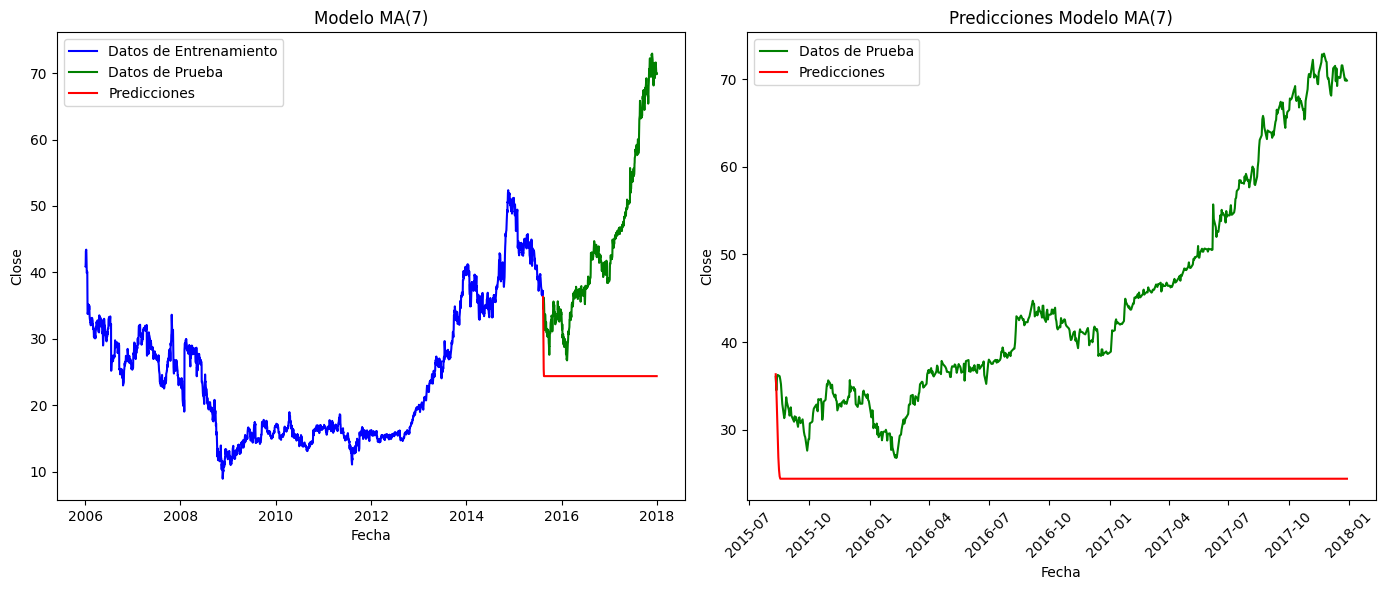

            Predicción MA(7)  Observación
Fecha                                    
2015-08-11         36.320236    36.030000
2015-08-12         34.525673    34.490000
2015-08-13         32.068987    35.930000
2015-08-14         29.293203    36.240000
2015-08-15         26.837601    36.193333
2015-08-16         25.427320    36.146667
2015-08-17         24.659299    36.100000
2015-08-18         24.390794    35.690000
2015-08-19         24.390794    35.190000
2015-08-20         24.390794    34.100000
2015-08-21         24.390794    32.930000
2015-08-22         24.390794    32.390000
2015-08-23         24.390794    31.850000
2015-08-24         24.390794    31.310000
2015-08-25         24.390794    31.740000
2015-08-26         24.390794    32.520000
2015-08-27         24.390794    33.690000
2015-08-28         24.390794    33.140000
2015-08-29         24.390794    32.840000
2015-08-30         24.390794    32.540000
2015-08-31         24.390794    32.240000
2015-09-01         24.390794    31

In [42]:
# Importar librerías necesarias
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Ajustar el modelo MA con los datos de entrenamiento
modelo_MA = ARIMA(y_train, order=(0, 0, 7))  # (p=0, d=0, q=7) para un modelo MA con 7 rezagos
result = modelo_MA.fit()

# Generar un rango de fechas para las predicciones
date_range = pd.date_range(start=y_test.index[0], periods=len(y_test), freq='D')

# Hacer predicciones en el conjunto de prueba
pred_MA = result.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)

# ---------------------- GRAFICOS ---------------------- #

# Crear una figura y ejes para los dos gráficos
plt.figure(figsize=(14, 6))

# Primer gráfico: Observaciones del conjunto de entrenamiento, predicciones y observaciones del conjunto de prueba
plt.subplot(1, 2, 1)
plt.plot(y_train.index, y_train, label="Datos de Entrenamiento", color="blue")
plt.plot(y_test.index, y_test, label="Datos de Prueba", color="green")
plt.plot(date_range, pred_MA, label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Close")
plt.title("Modelo MA(7)")
plt.legend()

# Segundo gráfico: Zoom en las observaciones del conjunto de prueba y las predicciones
plt.subplot(1, 2, 2)
plt.plot(y_test.index, y_test, label="Datos de Prueba", color="green")
plt.plot(date_range, pred_MA, label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Close")
plt.title("Predicciones Modelo MA(7)")
plt.legend()
plt.xticks(rotation=45)  # Girar las etiquetas del eje x en 45 grados

# Mostrar los gráficos
plt.tight_layout()
plt.show()

# ----------------------- TABLA ----------------------- #

# Crear una tabla de pandas con las fechas, predicciones y observaciones
pred_df = pd.DataFrame({"Fecha": date_range, "Predicción MA(7)": pred_MA, "Observación": y_test.values})
# Establecer las fechas como índice
pred_df.set_index("Fecha", inplace=True)
# Imprimir el DataFrame completo
print(pred_df.to_string(max_rows=len(pred_df)))


In [43]:
# -------------------- EVALUACIÓN -------------------- #

# Calcular las métricas
mae_MA = mean_absolute_error(y_test, pred_MA)
mape_MA = mean_absolute_percentage_error(y_test, pred_MA)
rmse_MA = rmse(y_test, pred_MA)
rmspe_MA = rmspe(y_test, pred_MA)
r2_MA = r2_score(y_test, pred_MA)

# Imprimir las métricas
print(f"MAE: {mae_MA:.2f}")
print(f"MAPE: {mape_MA:.2f}%")
print(f"RMSE: {rmse_MA:.2f}")
print(f"RMSPE: {rmspe_MA:.2f}%")
print(f"r2: {r2_MA:.2f}")

MAE: 20.18
MAPE: 0.41%
RMSE: 23.68
RMSPE: 4.38%
r2: -2.68


# Modelo ARMA

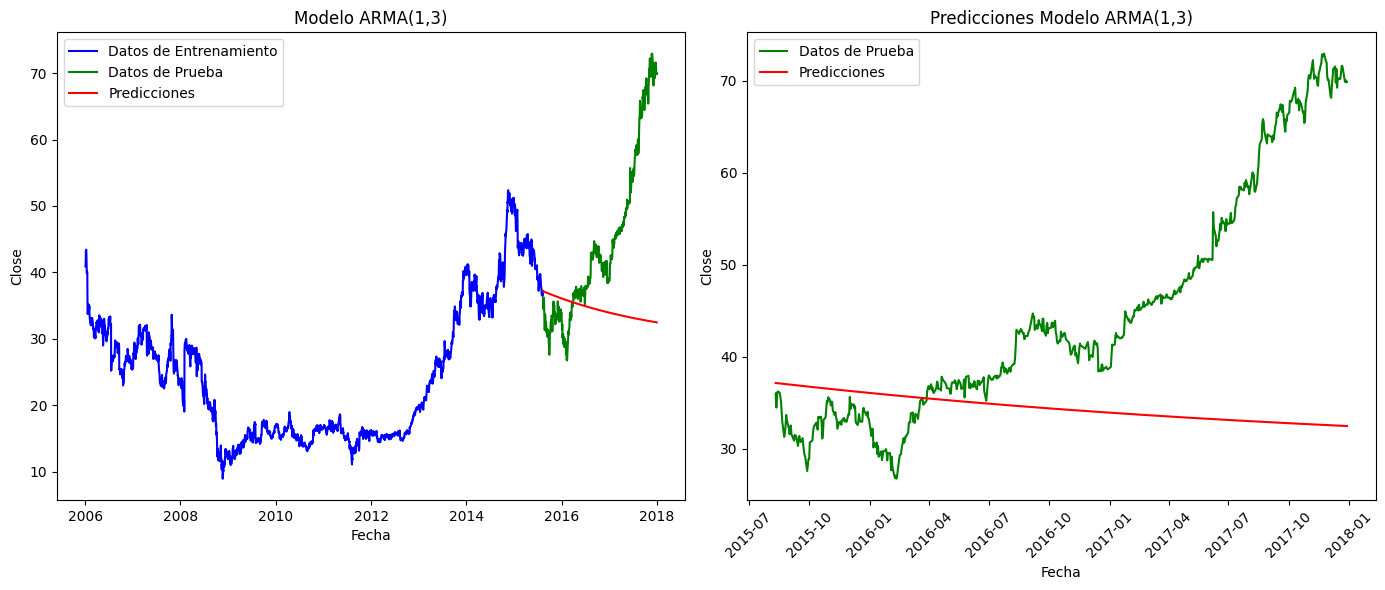

            Predicción ARMA(1,3)  Observación
Fecha                                        
2015-08-11             37.154360    36.030000
2015-08-12             37.149663    34.490000
2015-08-13             37.143254    35.930000
2015-08-14             37.135126    36.240000
2015-08-15             37.127006    36.193333
2015-08-16             37.118894    36.146667
2015-08-17             37.110791    36.100000
2015-08-18             37.102696    35.690000
2015-08-19             37.094609    35.190000
2015-08-20             37.086531    34.100000
2015-08-21             37.078461    32.930000
2015-08-22             37.070400    32.390000
2015-08-23             37.062347    31.850000
2015-08-24             37.054302    31.310000
2015-08-25             37.046265    31.740000
2015-08-26             37.038237    32.520000
2015-08-27             37.030217    33.690000
2015-08-28             37.022206    33.140000
2015-08-29             37.014203    32.840000
2015-08-30             37.006208  

In [44]:
# Importar librerías necesarias
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Ajustar el modelo ARMA con los datos de entrenamiento
modelo_ARMA = ARIMA(y_train, order=(1, 0, 3))  # (p=1, d=0, q=3) para un modelo ARMA con AR(1) y MA(3)
result = modelo_ARMA.fit()

# Generar un rango de fechas para las predicciones
date_range = pd.date_range(start=y_test.index[0], periods=len(y_test), freq='D')

# Hacer predicciones en el conjunto de prueba
pred_ARMA = result.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)

# ---------------------- GRAFICOS ---------------------- #

# Crear una figura y ejes para los dos gráficos
plt.figure(figsize=(14, 6))

# Primer gráfico: Observaciones del conjunto de entrenamiento, predicciones y observaciones del conjunto de prueba
plt.subplot(1, 2, 1)
plt.plot(y_train.index, y_train, label="Datos de Entrenamiento", color="blue")
plt.plot(y_test.index, y_test, label="Datos de Prueba", color="green")
plt.plot(date_range, pred_ARMA, label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Close")
plt.title("Modelo ARMA(1,3)")
plt.legend()

# Segundo gráfico: Zoom en las observaciones del conjunto de prueba y las predicciones
plt.subplot(1, 2, 2)
plt.plot(y_test.index, y_test, label="Datos de Prueba", color="green")
plt.plot(date_range, pred_ARMA, label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Close")
plt.title("Predicciones Modelo ARMA(1,3)")
plt.legend()
plt.xticks(rotation=45)  # Girar las etiquetas del eje x en 45 grados

# Mostrar los gráficos
plt.tight_layout()
plt.show()

# ----------------------- TABLA ----------------------- #

# Crear una tabla de pandas con las fechas, predicciones y observaciones
pred_df = pd.DataFrame({"Fecha": date_range, "Predicción ARMA(1,3)": pred_ARMA, "Observación": y_test.values})
# Establecer las fechas como índice
pred_df.set_index("Fecha", inplace=True)
# Imprimir el DataFrame completo
print(pred_df.to_string(max_rows=len(pred_df)))

In [45]:
# -------------------- EVALUACIÓN -------------------- #

# Calcular las métricas
mae_ARMA = mean_absolute_error(y_test, pred_ARMA)
mape_ARMA = mean_absolute_percentage_error(y_test, pred_ARMA)
rmse_ARMA = rmse(y_test, pred_ARMA)
rmspe_ARMA = rmspe(y_test, pred_ARMA)
r2_ARMA = r2_score(y_test, pred_ARMA)

# Imprimir las métricas
print(f"MAE: {mae_ARMA:.2f}")
print(f"MAPE: {mape_ARMA:.2f}%")
print(f"RMSE: {rmse_ARMA:.2f}")
print(f"RMSPE: {rmspe_ARMA:.2f}%")
print(f"r2: {r2_ARMA:.2f}")

MAE: 12.31
MAPE: 0.24%
RMSE: 16.92
RMSPE: 2.86%
r2: -0.88


# Modelo ARIMA(p,d,q)

C:\Users\Diego\anaconda3\envs\gpu\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


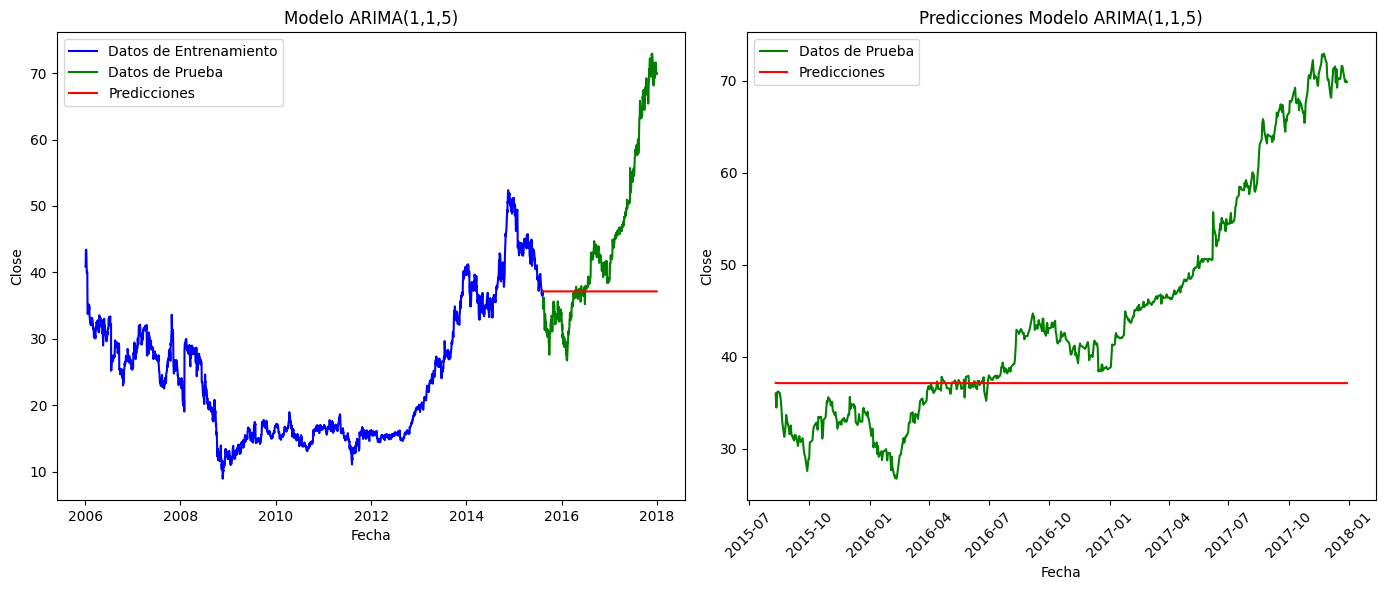

            Predicción ARIMA(1,1,5)  Observación
Fecha                                           
2015-08-11                37.172213    36.030000
2015-08-12                37.168443    34.490000
2015-08-13                37.159220    35.930000
2015-08-14                37.149110    36.240000
2015-08-15                37.144034    36.193333
2015-08-16                37.142599    36.146667
2015-08-17                37.142194    36.100000
2015-08-18                37.142080    35.690000
2015-08-19                37.142047    35.190000
2015-08-20                37.142038    34.100000
2015-08-21                37.142036    32.930000
2015-08-22                37.142035    32.390000
2015-08-23                37.142035    31.850000
2015-08-24                37.142035    31.310000
2015-08-25                37.142035    31.740000
2015-08-26                37.142035    32.520000
2015-08-27                37.142035    33.690000
2015-08-28                37.142035    33.140000
2015-08-29          

In [46]:
# Importar librerías necesarias
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Ajustar el modelo ARIMA con los datos de entrenamiento
modelo_ARIMA = ARIMA(y_train, order=(1, 1, 5))  # (p=1, d=1, q=5) para un modelo ARIMA con AR(1), diferencia de grado 1 y MA(5)
result = modelo_ARIMA.fit()

# Generar un rango de fechas para las predicciones
date_range = pd.date_range(start=y_test.index[0], periods=len(y_test), freq='D')

# Hacer predicciones en el conjunto de prueba
pred_ARIMA = result.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, typ='levels')  # typ='levels' para obtener las predicciones originales y no las diferencias

# ---------------------- GRAFICOS ---------------------- #

# Crear una figura y ejes para los dos gráficos
plt.figure(figsize=(14, 6))

# Primer gráfico: Observaciones del conjunto de entrenamiento, predicciones y observaciones del conjunto de prueba
plt.subplot(1, 2, 1)
plt.plot(y_train.index, y_train, label="Datos de Entrenamiento", color="blue")
plt.plot(y_test.index, y_test, label="Datos de Prueba", color="green")
plt.plot(date_range, pred_ARIMA, label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Close")
plt.title("Modelo ARIMA(1,1,5)")
plt.legend()

# Segundo gráfico: Zoom en las observaciones del conjunto de prueba y las predicciones
plt.subplot(1, 2, 2)
plt.plot(y_test.index, y_test, label="Datos de Prueba", color="green")
plt.plot(date_range, pred_ARIMA, label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Close")
plt.title("Predicciones Modelo ARIMA(1,1,5)")
plt.legend()
plt.xticks(rotation=45)  # Girar las etiquetas del eje x en 45 grados

# Mostrar los gráficos
plt.tight_layout()
plt.show()

# ----------------------- TABLA ----------------------- #

# Crear una tabla de pandas con las fechas, predicciones y observaciones
pred_df = pd.DataFrame({"Fecha": date_range, "Predicción ARIMA(1,1,5)": pred_ARIMA, "Observación": y_test.values})
# Establecer las fechas como índice
pred_df.set_index("Fecha", inplace=True)
# Imprimir el DataFrame completo
print(pred_df.to_string(max_rows=len(pred_df)))


In [47]:
# -------------------- EVALUACIÓN -------------------- #

# Calcular las métricas
mae_ARIMA = mean_absolute_error(y_test, pred_ARIMA)
mape_ARIMA = mean_absolute_percentage_error(y_test, pred_ARIMA)
rmse_ARIMA = rmse(y_test, pred_ARIMA)
rmspe_ARIMA = rmspe(y_test, pred_ARIMA)
r2_ARIMA = r2_score(y_test, pred_ARIMA)

# Imprimir las métricas
print(f"MAE: {mae_ARIMA:.2f}")
print(f"MAPE: {mape_ARIMA:.2f}%")
print(f"RMSE: {rmse_ARIMA:.2f}")
print(f"RMSPE: {rmspe_ARIMA:.2f}%")
print(f"r2: {r2_ARIMA:.2f}")

MAE: 10.17
MAPE: 0.20%
RMSE: 14.43
RMSPE: 2.44%
r2: -0.37


# Modelo SARIMA(p,d,q)(P,D,Q,s)

C:\Users\Diego\anaconda3\envs\gpu\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


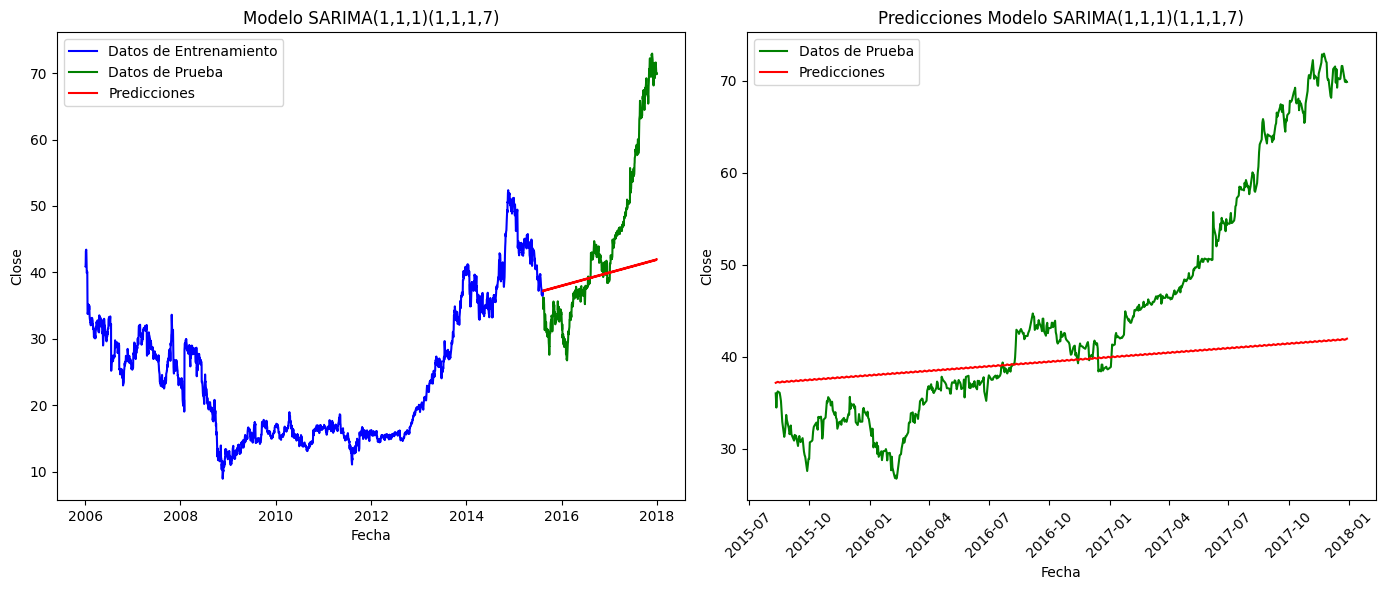

            Predicción SARIMA(1,1,1)(1,1,1,7)  Observación
Fecha                                                     
2015-08-11                          37.180161    36.030000
2015-08-12                          37.204563    34.490000
2015-08-13                          37.250040    35.930000
2015-08-14                          37.286451    36.240000
2015-08-15                          37.259576    36.193333
2015-08-16                          37.232690    36.146667
2015-08-17                          37.205802    36.100000
2015-08-18                          37.220903    35.690000
2015-08-19                          37.242265    35.190000
2015-08-20                          37.293090    34.100000
2015-08-21                          37.328218    32.930000
2015-08-22                          37.300036    32.390000
2015-08-23                          37.271853    31.850000
2015-08-24                          37.243672    31.310000
2015-08-25                          37.258668    31.7400

In [48]:
# Importar librerías necesarias
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajustar el modelo SARIMA con los datos de entrenamiento
modelo_SARIMA = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
result = modelo_SARIMA.fit()

# Generar un rango de fechas para las predicciones
date_range = pd.date_range(start=y_test.index[0], periods=len(y_test), freq='D')

# Hacer predicciones en el conjunto de prueba
pred_SARIMA = result.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, typ='levels')

# ---------------------- GRAFICOS ---------------------- #

# Crear una figura y ejes para los dos gráficos
plt.figure(figsize=(14, 6))

# Primer gráfico: Observaciones del conjunto de entrenamiento, predicciones y observaciones del conjunto de prueba
plt.subplot(1, 2, 1)
plt.plot(y_train.index, y_train, label="Datos de Entrenamiento", color="blue")
plt.plot(y_test.index, y_test, label="Datos de Prueba", color="green")
plt.plot(date_range, pred_SARIMA, label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Close")
plt.title("Modelo SARIMA(1,1,1)(1,1,1,7)")
plt.legend()

# Segundo gráfico: Zoom en las observaciones del conjunto de prueba y las predicciones
plt.subplot(1, 2, 2)
plt.plot(y_test.index, y_test, label="Datos de Prueba", color="green")
plt.plot(date_range, pred_SARIMA, label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Close")
plt.title("Predicciones Modelo SARIMA(1,1,1)(1,1,1,7)")
plt.legend()
plt.xticks(rotation=45)  # Girar las etiquetas del eje x en 45 grados

# Mostrar los gráficos
plt.tight_layout()
plt.show()

# ----------------------- TABLA ----------------------- #

# Crear una tabla de pandas con las fechas, predicciones y observaciones
pred_df = pd.DataFrame({"Fecha": date_range, "Predicción SARIMA(1,1,1)(1,1,1,7)": pred_SARIMA, "Observación": y_test.values})
# Establecer las fechas como índice
pred_df.set_index("Fecha", inplace=True)
# Imprimir el DataFrame completo
print(pred_df.to_string(max_rows=len(pred_df)))

In [49]:
# -------------------- EVALUACIÓN -------------------- #

# Calcular las métricas
mae_SARIMA = mean_absolute_error(y_test, pred_SARIMA)
mape_SARIMA = mean_absolute_percentage_error(y_test, pred_SARIMA)
rmse_SARIMA = rmse(y_test, pred_SARIMA)
rmspe_SARIMA = rmspe(y_test, pred_SARIMA)
r2_SARIMA = r2_score(y_test, pred_SARIMA)

# Imprimir las métricas
print(f"MAE: {mae_SARIMA:.2f}")
print(f"MAPE: {mape_SARIMA:.2f}%")
print(f"RMSE: {rmse_SARIMA:.2f}")
print(f"RMSPE: {rmspe_SARIMA:.2f}%")
print(f"r2: {r2_SARIMA:.2f}")

MAE: 8.56
MAPE: 0.17%
RMSE: 12.19
RMSPE: 2.11%
r2: 0.02


# REDES NEURONALES


# PREPROCESAMIENTO

In [50]:
# Importar librerías necesarias
import numpy as np
import tensorflow as tf
import random
from sklearn.model_selection import train_test_split

# Fijar la semilla aleatoria para reproducibilidad
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Especificar el punto de división del conjunto de entrenamiento y prueba
split_date = pd.to_datetime('2015-08-10 00:00:00')  # Se utiliza como fecha de corte el último mes del dataset
# (Dependiendo del caso, el tamaño del conjunto de prueba puede ser mayor o menor)

# Dividir los datos en conjuntos de entrenamiento y prueba
train = df.loc[df.index <= split_date]
test = df.loc[df.index > split_date]

# Definir variable objetivo
y_train = train["Close"]
y_test = test["Close"]

# Todas las columnas excepto "Close" son variables exógenas
X_train = train.drop(columns=["Close"])
X_test = test.drop(columns=["Close"])

# -------------------- NORMALIZACIÓN DE LOS DATOS -------------------- #

# Importar librerías necesarias
from sklearn.preprocessing import StandardScaler

# Inicializar el escalador
scaler = StandardScaler()

# Normalizar los datos de entrenamiento y prueba de las variables exógenas
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
# Convertir DataFrame a array de numpy
X_train = np.array(X_train)
X_test = np.array(X_test)

# Redimensionar los datos normalizados para que se ajusten al formato de entrada de la red neuronal
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [52]:
print(X_train.shape)
print(X_test.shape)

(2416, 1, 3)
(603, 1, 3)


# SimpleRNN

In [53]:
# Importar las bibliotecas necesarias
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# -------------------- DEFINICIÓN DEL MODELO -------------------- #
modelo_RNN = Sequential()

# ------------------ CAPAS DE LA RED NEURONAL ------------------ #

# 1. Capa de entrada:
modelo_RNN.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
modelo_RNN.add(Dropout(0.2))

# 2. Capas ocultas:
modelo_RNN.add(LSTM(units=50, activation='relu', return_sequences=True))
modelo_RNN.add(Dropout(0.2))
modelo_RNN.add(LSTM(units=50, activation='relu'))
modelo_RNN.add(Dropout(0.2))
modelo_RNN.add(Dense(50, activation='relu'))
modelo_RNN.add(Dropout(0.2))

# 3. Capa de salida
modelo_RNN.add(Dense(1))

# -------------------- COMPILACIÓN -------------------- #
modelo_RNN.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# -------------------- CALLBACKS -------------------- #
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# -------------------- ENTRENAMIENTO -------------------- #
entrenamiento = modelo_RNN.fit(X_train, y_train, 
                               epochs=100, 
                               batch_size=32, 
                               validation_data=(X_test, y_test), 
                               verbose=1,
                               callbacks=[early_stopping, model_checkpoint])



Epoch 1/100

76/76 [==============================] - 3s 7ms/step - loss: 605.5679 - val_loss: 6217.9297
Epoch 2/100
76/76 [==============================] - 0s 3ms/step - loss: 180.4285 - val_loss: 1555.8390
Epoch 3/100
76/76 [==============================] - 0s 3ms/step - loss: 55.2361 - val_loss: 125.1066
Epoch 4/100
76/76 [==============================] - 0s 3ms/step - loss: 23.3076 - val_loss: 19.1906
Epoch 5/100
76/76 [==============================] - 0s 3ms/step - loss: 20.0071 - val_loss: 2.8772
Epoch 6/100
76/76 [==============================] - 0s 2ms/step - loss: 17.5172 - val_loss: 6.8390
Epoch 7/100
76/76 [==============================] - 0s 2ms/step - loss: 18.2631 - val_loss: 3.9820
Epoch 8/100
76/76 [==============================] - 0s 3ms/step - loss: 16.0257 - val_loss: 1.7215
Epoch 9/100
76/76 [==============================] - 0s 2ms/step - loss: 15.7388 - val_loss: 14.3162
Epoch 10/100
76/76 [==============================] - 0s 2ms/step - loss: 16.2670 - va

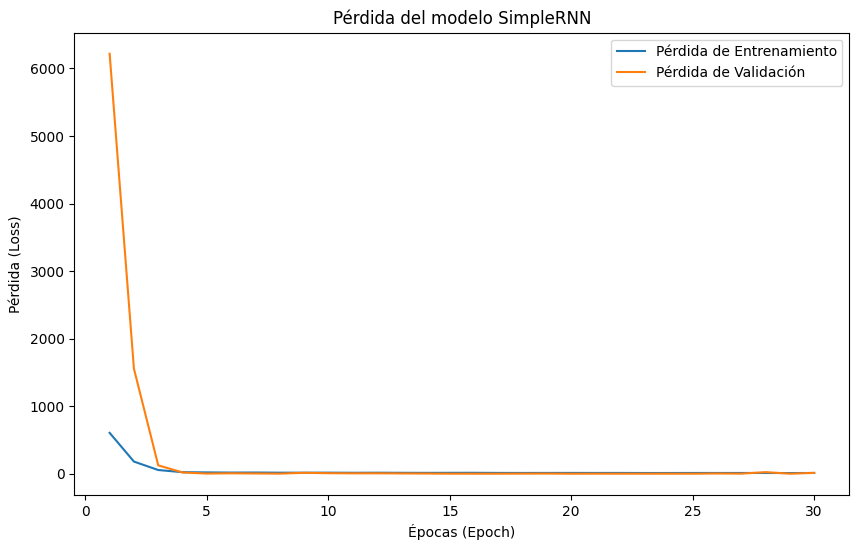

In [55]:
# ------------------- PÉRDIDA DEL MODELO ------------------- #

# Importar las bibliotecas necesarias
import matplotlib.pyplot as plt

# Graficar la función de pérdida versus las épocas
loss = entrenamiento.history['loss']
val_loss = entrenamiento.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss, label='Pérdida de Validación')
plt.title('Pérdida del modelo SimpleRNN')
plt.xlabel('Épocas (Epoch)')
plt.ylabel('Pérdida (Loss)')
plt.legend()
plt.show()

19/19 [==============================] - 0s 946us/step


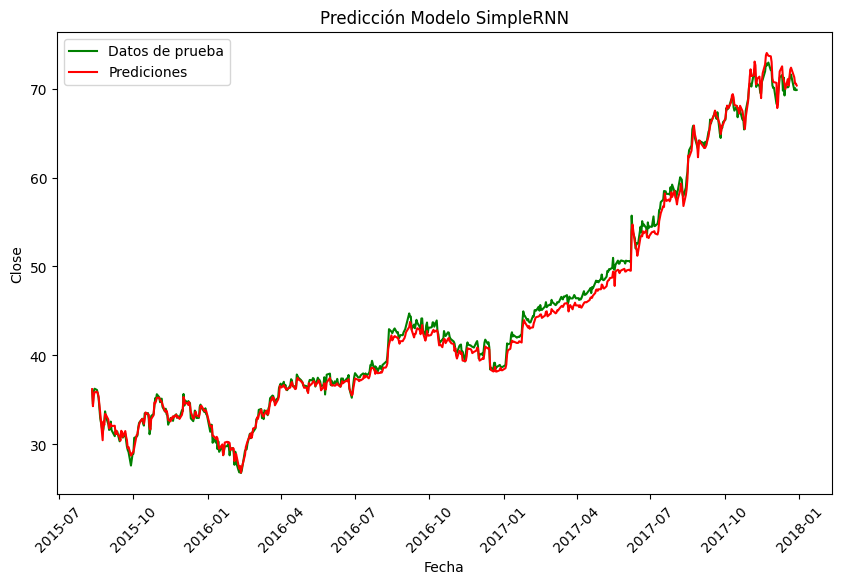

In [56]:
# -------------------- PREDICCIÓN -------------------- #

# Realizar predicciones con el conjunto de prueba de las variables exógenas
pred_RNN = modelo_RNN.predict(X_test)

# Visualizar los resultados
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test.values, color='green', label='Datos de prueba')
plt.plot(y_test.index, pred_RNN, color='red', label='Prediciones')
plt.title('Predicción Modelo SimpleRNN')
plt.xlabel('Fecha')
plt.ylabel('Close')
plt.legend()
plt.xticks(rotation=45)  # Girar las etiquetas del eje x en 45 grados
plt.show()

In [57]:
# -------------------- EVALUACIÓN -------------------- #

# Importar librerías necesarias
from statsmodels.tools.eval_measures import rmspe, rmse
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.metrics import r2_score

# Calcular las métricas
mae_RNN = mean_absolute_error(y_test, pred_RNN)
mape_RNN = mean_absolute_percentage_error(y_test, pred_RNN)
rmse_RNN = np.sqrt(mean_squared_error(y_test, pred_RNN))
rmspe_RNN = rmspe(y_test, pred_RNN)[0]  # Tomamos el primer valor del array
r2_RNN = r2_score(y_test, pred_RNN)

# Imprimir las métricas
print(f"MAE: {mae_RNN:.2f}")
print(f"MAPE: {mape_RNN:.2f}%")
print(f"RMSE: {rmse_RNN:.2f}")
print(f"RMSPE: {rmspe_RNN:.2f}%")
print(f"R2: {r2_RNN:.2f}")

MAE: 0.58
MAPE: 0.01%
RMSE: 0.70
RMSPE: 0.05%
R2: 1.00


# Red LSTM

In [58]:
# Importar librerías necesarias
from keras.layers import LSTM

# -------------------- DEFINICIÓN DEL MODELO -------------------- #

# Creación de un modelo con estructura secuencial
modelo_LSTM = Sequential()

# ------------------ CAPAS DE LA RED NEURONAL ------------------ #

# 1. Capa de entrada:
# Capa LSTM con 50 neuronas y función de activación ReLU para extraer características de la secuencia de entrada.
modelo_LSTM.add(LSTM(units=50, activation='relu'))

# 2. Capas ocultas:

# Capa densa con regularización L2 (λ = 0.01) para controlar el crecimiento de los pesos y reducir el sobreajuste:
modelo_LSTM.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01)))

# 3. Capa de salida
modelo_LSTM.add(Dense(1))

# -------------------- COMPILACIÓN -------------------- #

# Compilar el modelo con optimizador Adam con tasa de aprendizaje=0.001 para disminuir la función de pérdida mse
modelo_LSTM.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# -------------------- ENTRENAMIENTO -------------------- #

# Entrenar el modelo con los conjuntos de entrenamiento
entrenamiento = modelo_LSTM.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100
76/76 [==============================] - 1s 3ms/step - loss: 663.5265 - val_loss: 1717.1044
Epoch 2/100
76/76 [==============================] - 0s 1ms/step - loss: 392.1496 - val_loss: 440.0315
Epoch 3/100
76/76 [==============================] - 0s 1ms/step - loss: 124.3833 - val_loss: 936.4979
Epoch 4/100
76/76 [==============================] - 0s 1ms/step - loss: 86.8487 - val_loss: 777.2564
Epoch 5/100
76/76 [==============================] - 0s 1ms/step - loss: 41.3188 - val_loss: 314.0526
Epoch 6/100
76/76 [==============================] - 0s 1ms/step - loss: 11.1619 - val_loss: 76.7727
Epoch 7/100
76/76 [==============================] - 0s 1ms/step - loss: 2.5698 - val_loss: 24.6434
Epoch 8/100
76/76 [==============================] - 0s 1ms/step - loss: 1.5331 - val_loss: 16.6740
Epoch 9/100
76/76 [==============================] - 0s 1ms/step - loss: 1.4179 - val_loss: 13.9786
Epoch 10/100
76/76 [==============================] - 0s 1ms/step - loss: 1.3565 - va

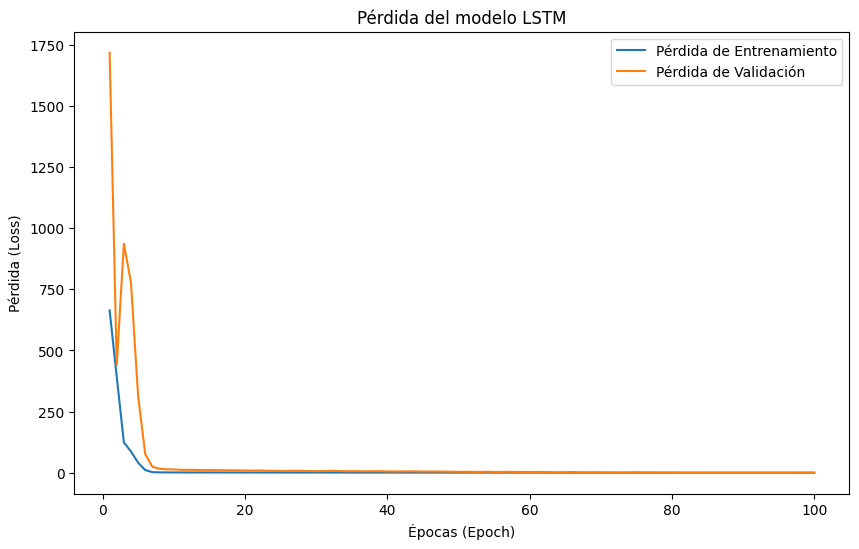

In [59]:
# ------------------- PÉRDIDA DEL MODELO ------------------- #

# Graficar la función de pérdida versus las épocas
loss = entrenamiento.history['loss']
val_loss = entrenamiento.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss, label='Pérdida de Validación')
plt.title('Pérdida del modelo LSTM')
plt.xlabel('Épocas (Epoch)')
plt.ylabel('Pérdida (Loss)')
plt.legend()
plt.show()

19/19 [==============================] - 0s 751us/step


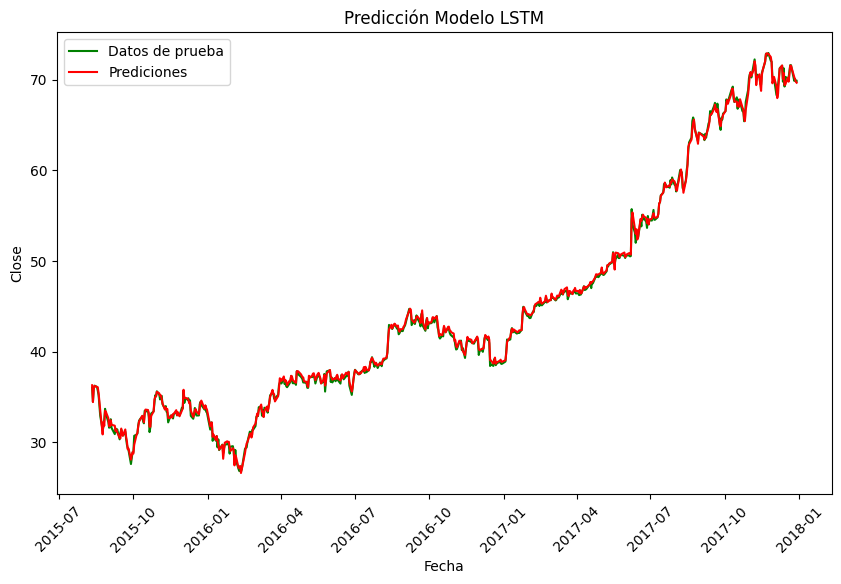

In [60]:
# -------------------- PREDICCIÓN -------------------- #

# Realizar predicciones con el conjunto de prueba de las variables exógenas
pred_LSTM = modelo_LSTM.predict(X_test)

# Visualizar los resultados
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test.values, color='green', label='Datos de prueba')
plt.plot(y_test.index, pred_LSTM, color='red', label='Prediciones')
plt.title('Predicción Modelo LSTM')
plt.xlabel('Fecha')
plt.ylabel('Close')
plt.legend()
plt.xticks(rotation=45)  # Girar las etiquetas del eje x en 45 grados
plt.show()

In [61]:
# -------------------- EVALUACIÓN -------------------- #

# Calcular las métricas para el modelo LSTM
mae_LSTM = mean_absolute_error(y_test, pred_LSTM)
mape_LSTM = mean_absolute_percentage_error(y_test, pred_LSTM)
rmse_LSTM = np.sqrt(mean_squared_error(y_test, pred_LSTM))
rmspe_LSTM = rmspe(y_test, pred_LSTM)[0]  # Tomamos el primer valor del array
r2_LSTM = r2_score(y_test, pred_LSTM)

# Imprimir las métricas del modelo LSTM
print(f"MAE: {mae_LSTM:.2f}")
print(f"MAPE: {mape_LSTM:.2f}%")
print(f"RMSE: {rmse_LSTM:.2f}")
print(f"RMSPE: {rmspe_LSTM:.2f}%")
print(f"R2: {r2_LSTM:.2f}")


MAE: 0.24
MAPE: 0.01%
RMSE: 0.31
RMSPE: 0.07%
R2: 1.00


# Red GRU

In [62]:
# Importar librerías necesarias
from keras.layers import GRU

# -------------------- DEFINICIÓN DEL MODELO -------------------- #

# Creación de un modelo con estructura secuencial
modelo_GRU = Sequential()

# ------------------ CAPAS DE LA RED NEURONAL ------------------ #

# 1. Capa de entrada:
# Capa GRU con 50 unidades y función de activación relu
modelo_GRU.add(GRU(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))

# 2. Capas ocultas

# Capa de dropout con una tasa de 20% para regularizar y prevenir el sobreajuste:
modelo_GRU.add(Dropout(0.2))

# Capa densa con regularización L2 (λ = 0.01) para controlar el crecimiento de los pesos y reducir el sobreajuste:
modelo_GRU.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01)))

# 3. Capa de salida
modelo_GRU.add(Dense(1))

# -------------------- COMPILACIÓN -------------------- #

# Compilar el modelo con optimizador Adam con tasa de aprendizaje=0.001 para disminuir la función de pérdida mse
modelo_GRU.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])

# -------------------- ENTRENAMIENTO -------------------- #

# Entrenar el modelo con los conjuntos de entrenamiento
entrenamiento = modelo_GRU.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100

76/76 [==============================] - 1s 4ms/step - loss: 622.2248 - mean_absolute_error: 23.0160 - val_loss: 1232.8052 - val_mean_absolute_error: 34.4992
Epoch 2/100
76/76 [==============================] - 0s 1ms/step - loss: 215.7929 - mean_absolute_error: 12.1903 - val_loss: 462.2991 - val_mean_absolute_error: 14.8816
Epoch 3/100
76/76 [==============================] - 0s 1ms/step - loss: 45.1016 - mean_absolute_error: 5.3251 - val_loss: 192.4757 - val_mean_absolute_error: 9.3267
Epoch 4/100
76/76 [==============================] - 0s 1ms/step - loss: 17.0988 - mean_absolute_error: 3.1863 - val_loss: 56.0229 - val_mean_absolute_error: 4.8528
Epoch 5/100
76/76 [==============================] - 0s 1ms/step - loss: 9.1536 - mean_absolute_error: 2.1888 - val_loss: 15.0527 - val_mean_absolute_error: 2.3499
Epoch 6/100
76/76 [==============================] - 0s 1ms/step - loss: 6.8925 - mean_absolute_error: 1.8563 - val_loss: 9.3378 - val_mean_absolute_error: 2.2816
Ep

76/76 [==============================] - 0s 1ms/step - loss: 1.3388 - mean_absolute_error: 0.6879 - val_loss: 0.3018 - val_mean_absolute_error: 0.3311
Epoch 100/100
76/76 [==============================] - 0s 1ms/step - loss: 1.3667 - mean_absolute_error: 0.6892 - val_loss: 0.3129 - val_mean_absolute_error: 0.3421


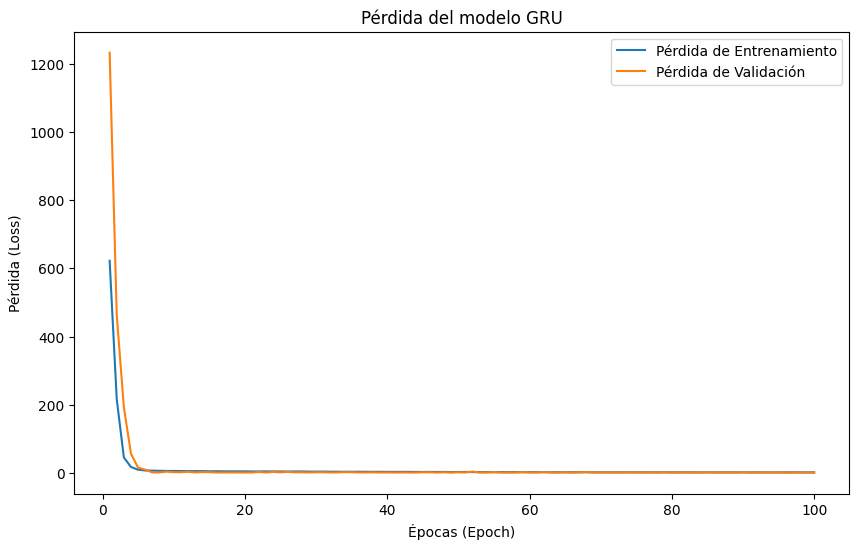

In [63]:
# ------------------- PÉRDIDA DEL MODELO ------------------- #

# Graficar la función de pérdida versus las épocas
loss = entrenamiento.history['loss']
val_loss = entrenamiento.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss, label='Pérdida de Validación')
plt.title('Pérdida del modelo GRU')
plt.xlabel('Épocas (Epoch)')
plt.ylabel('Pérdida (Loss)')
plt.legend()
plt.show()


19/19 [==============================] - 0s 679us/step


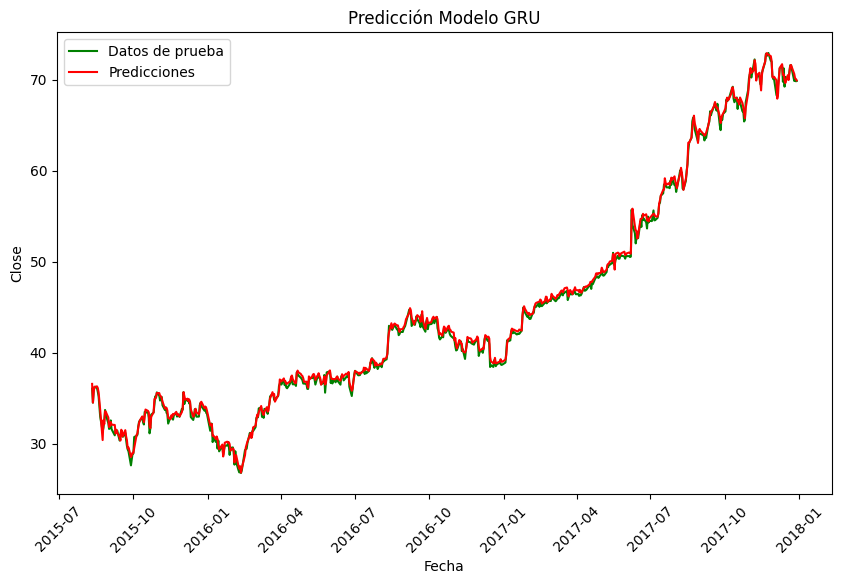

In [64]:
# -------------------- PREDICCIÓN -------------------- #

# Realizar predicciones con el conjunto de prueba de las variables exógenas
pred_GRU = modelo_GRU.predict(X_test)

# Visualizar los resultados
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test.values, color='green', label='Datos de prueba')
plt.plot(y_test.index, pred_GRU, color='red', label='Predicciones')
plt.title('Predicción Modelo GRU')
plt.xlabel('Fecha')
plt.ylabel('Close')
plt.legend()
plt.xticks(rotation=45)  # Girar las etiquetas del eje x en 45 grados
plt.show()

In [65]:
# -------------------- EVALUACIÓN -------------------- #

# Calcular las métricas
mae_GRU = mean_absolute_error(y_test, pred_GRU)
mape_GRU = mean_absolute_percentage_error(y_test, pred_GRU)
rmse_GRU = np.sqrt(mean_squared_error(y_test, pred_GRU))
rmspe_GRU = rmspe(y_test, pred_GRU)[0]  # Tomamos el primer valor del array
r2_GRU = r2_score(y_test, pred_GRU)

# Imprimir las métricas
print(f"MAE: {mae_GRU:.2f}")
print(f"MAPE: {mape_GRU:.2f}%")
print(f"RMSE: {rmse_GRU:.2f}")
print(f"RMSPE: {rmspe_GRU:.2f}%")
print(f"R2: {r2_GRU:.2f}")

MAE: 0.34
MAPE: 0.01%
RMSE: 0.43
RMSPE: 0.15%
R2: 1.00


# EVALUACION

# MODELOS ESTOCASTICOS

In [66]:
# Crear tabla con las métricas de cada modelo
tabla = pd.DataFrame({'Métrica':['MAE:','MAPE:','RMSE:','RMSPE:','r2:'],
                      'AR':[mae_AR,mape_AR,rmse_AR,rmspe_AR,r2_AR],
                      'MA':[mae_MA,mape_MA,rmse_MA,rmspe_MA,r2_MA],
                      'ARMA':[mae_ARMA,mape_ARMA,rmse_ARMA,rmspe_ARMA,r2_ARMA],
                      'ARIMA':[mae_ARIMA,mape_ARIMA,rmse_ARIMA,rmspe_ARIMA,r2_ARIMA],
                      'SARIMA':[mae_SARIMA,mape_SARIMA,rmse_SARIMA,rmspe_SARIMA,r2_SARIMA]})

# Redondear los valores de la tabla a dos decimales
tabla = tabla.round(2)
tabla

,Métrica,AR,MA,ARMA,ARIMA,SARIMA
0,MAE:,12.22,20.18,12.31,10.17,8.56
1,MAPE:,0.23,0.41,0.24,0.20,0.17
2,RMSE:,16.88,23.68,16.92,14.43,12.19
3,RMSPE:,2.84,4.38,2.86,2.44,2.11
4,r2:,-0.87,-2.68,-0.88,-0.37,0.02


# REDES NEURONALES

In [67]:
# Crear tabla con las métricas de cada modelo
tabla = pd.DataFrame({'Metrica':['MAE:','MAPE:','RMSE:','RMSPE:','r2:'],
                      'SimpleRNN':[mae_RNN,mape_RNN,rmse_RNN,rmspe_RNN,r2_RNN],
                      'LSTM':[mae_LSTM,mape_LSTM,rmse_LSTM,rmspe_LSTM,r2_LSTM],
                      'GRU':[mae_LSTM,mape_LSTM,rmse_LSTM,rmspe_LSTM,r2_GRU]})

# Redondear los valores de la tabla a dos decimales
tabla = tabla.round(2)

#  Mostrar tabla
tabla

,Metrica,SimpleRNN,LSTM,GRU
0,MAE:,0.58,0.24,0.24
1,MAPE:,0.01,0.01,0.01
2,RMSE:,0.70,0.31,0.31
3,RMSPE:,0.05,0.07,0.07
4,r2:,1.00,1.00,1.00


In [68]:
import numpy as np
from scipy.stats import shapiro, bartlett

# Definir función para realizar las pruebas de diagnóstico
def diagnostico_nn(predicciones):
    # Calcular residuos
    residuos = y_test.values - predicciones.ravel()

    # Prueba de Normalidad
    stat_normalidad, p_normalidad = shapiro(residuos)
    resultado_normalidad = "Distribución normal" if p_normalidad >= 0.05 else "No sigue una distribución normal"

    # Prueba de Heterocedasticidad
    stat_heterocedasticidad, p_heterocedasticidad = bartlett(residuos, np.arange(len(residuos)))
    resultado_heterocedasticidad = "Homocedástico" if p_heterocedasticidad >= 0.05 else "Heterocedástico"

    # Mostrar resultados
    print("Prueba de Normalidad:")
    print(f"  - Estadístico: {stat_normalidad}")
    print(f"  - P-value: {p_normalidad}")
    print(f"  - Resultado: {resultado_normalidad}")
    print("\nPrueba de Heterocedasticidad:")
    print(f"  - Estadístico: {stat_heterocedasticidad}")
    print(f"  - P-value: {p_heterocedasticidad}")
    print(f"  - Resultado: {resultado_heterocedasticidad}")

# Realizar pruebas de diagnóstico para cada modelo de red neuronal
print("Modelo SimpleRNN:")
diagnostico_nn(pred_RNN)

print("\nModelo LSTM:")
diagnostico_nn(pred_LSTM)

print("\nModelo GRU:")
diagnostico_nn(pred_GRU)

Modelo SimpleRNN:
Prueba de Normalidad:
  - Estadístico: 0.9851772785186768
  - P-value: 8.37104471429484e-06
  - Resultado: No sigue una distribución normal

Prueba de Heterocedasticidad:
  - Estadístico: 5937.501930294854
  - P-value: 0.0
  - Resultado: Heterocedástico

Modelo LSTM:
Prueba de Normalidad:
  - Estadístico: 0.9772202968597412
  - P-value: 4.495730721032487e-08
  - Resultado: No sigue una distribución normal

Prueba de Heterocedasticidad:
  - Estadístico: 6835.450204780242
  - P-value: 0.0
  - Resultado: Heterocedástico

Modelo GRU:
Prueba de Normalidad:
  - Estadístico: 0.9867558479309082
  - P-value: 2.771405161183793e-05
  - Resultado: No sigue una distribución normal

Prueba de Heterocedasticidad:
  - Estadístico: 6596.789055017533
  - P-value: 0.0
  - Resultado: Heterocedástico


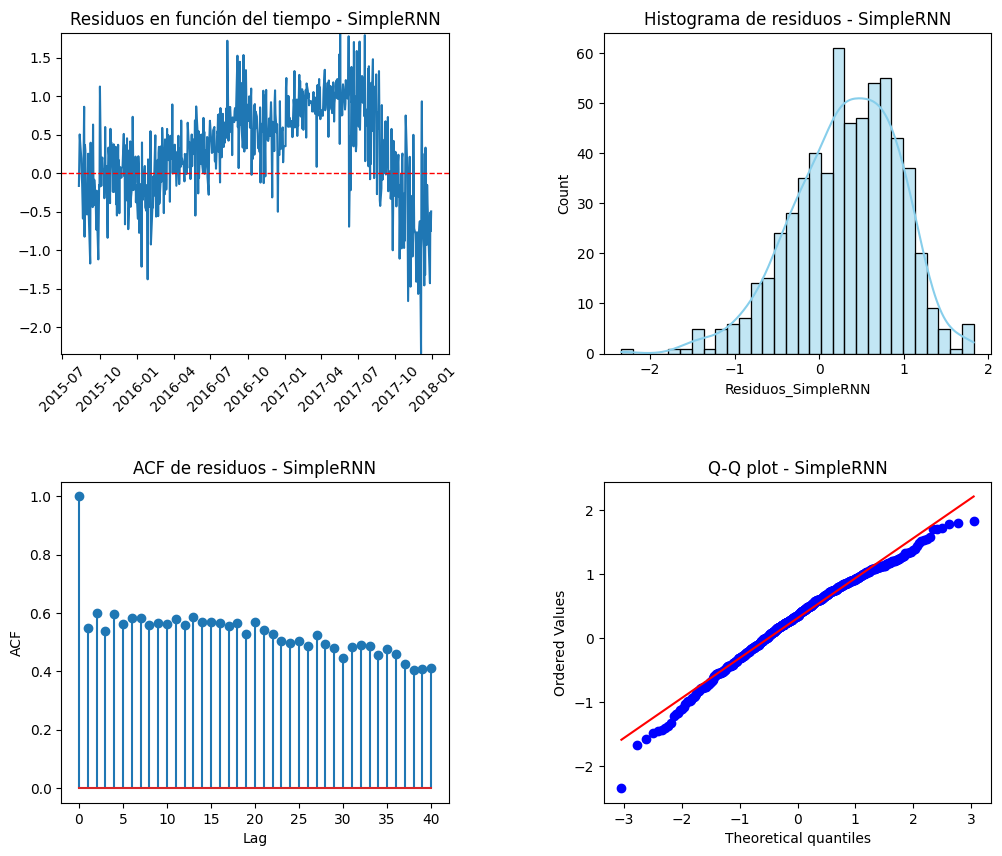

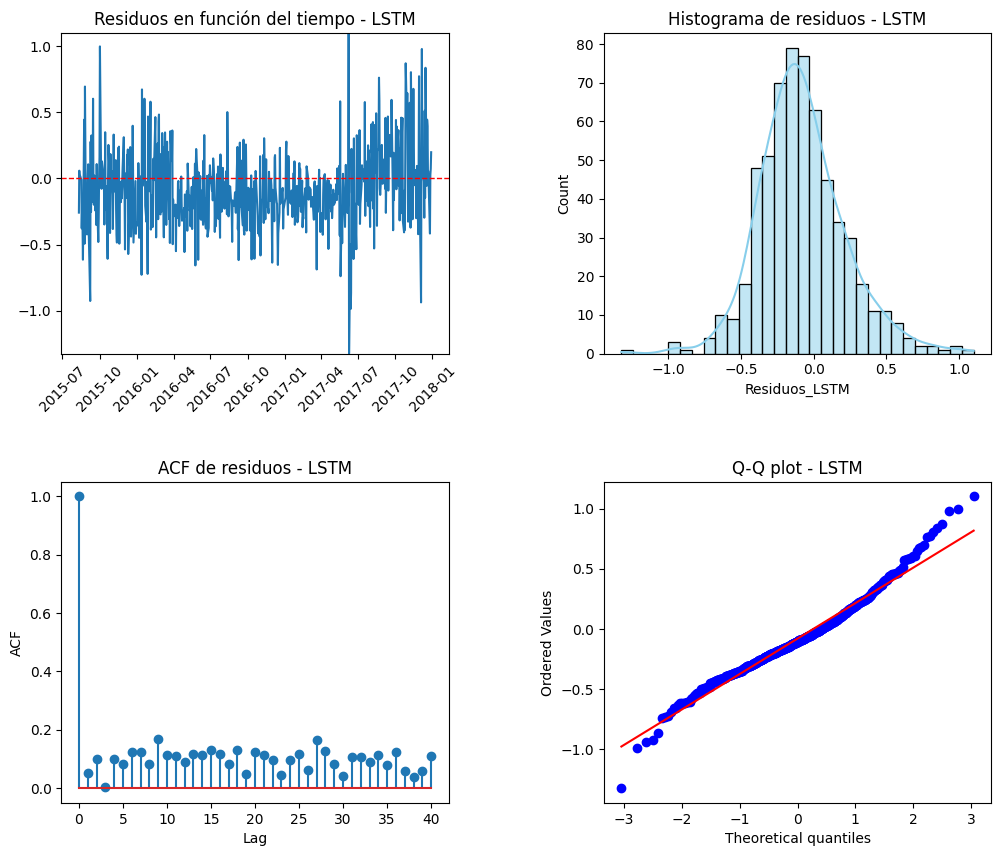

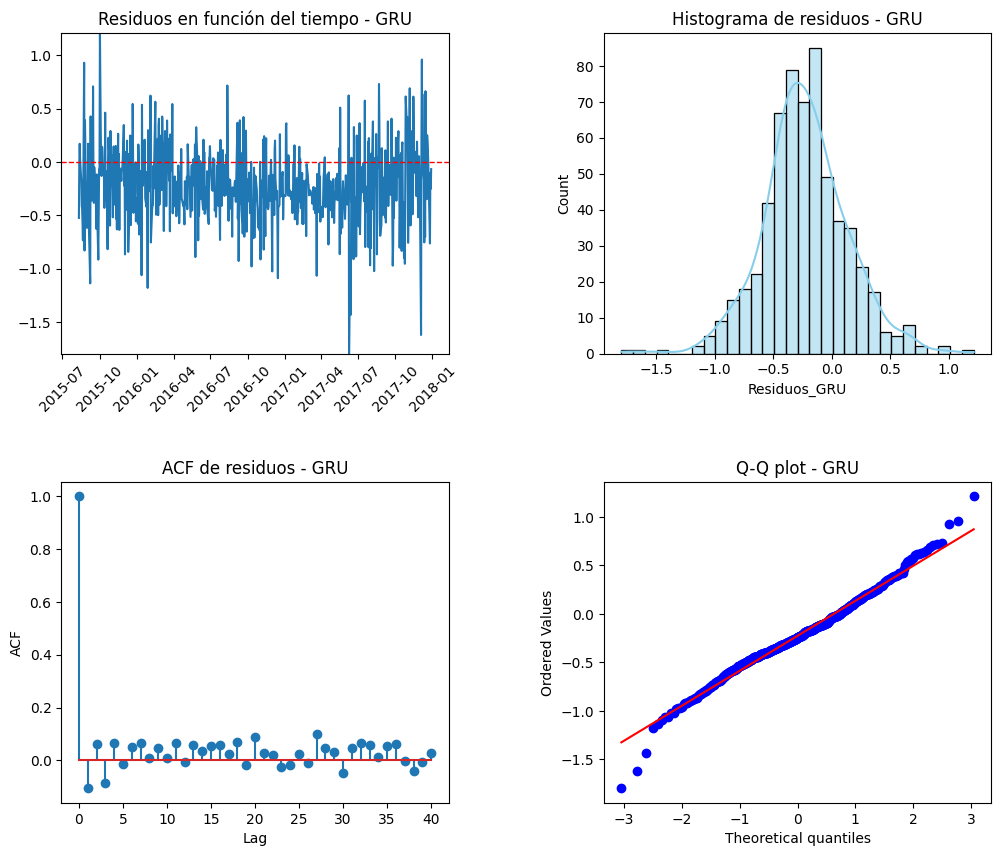

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def plot_diagnostics_nn(y_test, predicciones, modelo):
    residuos = y_test.values - predicciones.flatten()
    residuos_df = pd.DataFrame({"Fecha": y_test.index, f"Residuos_{modelo}": residuos})

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Residuos en función del tiempo
    axes[0, 0].plot(residuos_df["Fecha"], residuos_df[f"Residuos_{modelo}"])
    axes[0, 0].axhline(0, color='red', linestyle='--', linewidth=1)  # Agregar línea en cero
    axes[0, 0].set_title(f'Residuos en función del tiempo - {modelo}')
    axes[0, 0].set_ylim([min(residuos_df[f"Residuos_{modelo}"]), max(residuos_df[f"Residuos_{modelo}"])])  # Ajustar la escala del eje y
    axes[0, 0].tick_params(axis='x', rotation=45)  # Ajustar el formato de las etiquetas del eje x

    # Histograma de los residuos
    sns.histplot(residuos_df[f"Residuos_{modelo}"], bins=30, ax=axes[0, 1], kde=True, color='skyblue', edgecolor='black')
    axes[0, 1].set_title(f'Histograma de residuos - {modelo}')

    # ACF de los residuos
    acf = [1. if lag == 0 else np.corrcoef(residuos[:-lag], residuos[lag:])[0, 1] for lag in range(41)]
    axes[1, 0].stem(np.arange(41), acf)
    axes[1, 0].set_title(f'ACF de residuos - {modelo}')
    axes[1, 0].set_xlabel('Lag')
    axes[1, 0].set_ylabel('ACF')

    # Q-Q plot de los residuos
    stats.probplot(residuos_df[f"Residuos_{modelo}"], dist="norm", plot=axes[1, 1])
    axes[1, 1].set_title(f'Q-Q plot - {modelo}')

    # Ajustar manualmente el espaciado entre subparcelas
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    plt.show()

plot_diagnostics_nn(y_test, pred_RNN, 'SimpleRNN')
plot_diagnostics_nn(y_test, pred_LSTM, 'LSTM')
plot_diagnostics_nn(y_test, pred_GRU, 'GRU')